In [1]:
import spike.spike_analysis.spike_collection as sc
import spike.spike_analysis.spike_recording as sr
import spike.spike_analysis.firing_rate_calculations as fr
import spike.spike_analysis.normalization as norm
import spike.spike_analysis.single_cell as single_cell
import spike.spike_analysis.spike_collection as collection
import spike.spike_analysis.zscoring as zscoring
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import os
import behavior.boris_extraction as boris
import matplotlib.pyplot as plt
import pickle
import re
import ast
import importlib

Seems that we have different days for the same subject, maybe we can look to see if across days do neurons spiking patterns change in all subjects? Does it change for subjects that win more?

In [2]:
pd.set_option('display.max_colwidth', 0)  # 0 means unlimited in newer pandas versions

# Show all rows
pd.set_option("display.max_rows", None)

# Show all columns
pd.set_option("display.max_columns", None)

# Don’t truncate column contents
pd.set_option("display.max_colwidth", None)

# Expand the display to the full width of the screen
pd.set_option("display.width", 0)


In [3]:
df_path = r"C:\Users\thoma\Code\ResearchCode\diff_fam_social_memory_ephys\other_peoples_sutff\Thomas\reward_comp\outputs\zscores_event_specific_standardway.csv"

In [4]:
# 1) Read
units_df = pd.read_csv(df_path)
units_df.head(30)

,Recording,Event name,Unit number,Pre-event M,Pre-event SD,Event M,Event Z-Score,sig,Event windows
0,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,104,0.075,0.098058,0.075,0.000000,not sig,40
1,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,11,0.250,0.263117,0.270,0.076012,not sig,40
2,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,122,0.060,0.103280,0.185,1.210307,not sig,40
3,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,125,0.745,0.441414,0.690,-0.124600,not sig,40
4,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,126,4.010,1.378182,3.215,-0.576847,not sig,40
5,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,130,0.055,0.119722,0.105,0.417635,not sig,40
6,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,143,0.850,0.361620,0.970,0.331840,not sig,40
7,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,147,0.030,0.072324,0.060,0.414800,not sig,40
8,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,158,0.190,0.230718,0.570,1.647033,not sig,40
9,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,189,1.855,0.554677,1.815,-0.072114,not sig,40


In [5]:
units_df = units_df[units_df['sig'] != 'not sig']
units_df = units_df.drop(["Pre-event M", "Pre-event SD", "Event M"], axis=1)

In [6]:
df = units_df.copy()
event_df = df[df['Event name'] == 'high_comp_win']

significant_units = event_df['Unit number'].unique()
print(f"Number of significant units for high_comp_win: {len(significant_units)}")

Number of significant units for high_comp_win: 22


In [7]:
units_df.head(10)

,Recording,Event name,Unit number,Event Z-Score,sig,Event windows
15,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,232,3.047514,increase,40
59,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,high_comp,232,1.668002,increase,9
62,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,high_comp,65,1.878280,increase,9
78,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,high_comp_lose,211,1.835667,increase,1
125,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,high_comp_win,232,1.897931,increase,8
323,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,win,232,2.498572,increase,13
330,20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec,alone_rewarded,12,3.142302,increase,40
331,20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec,alone_rewarded,15,-2.199950,decrease,40
336,20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec,alone_rewarded,52,19.119122,increase,40
339,20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec,alone_rewarded,68,9.742588,increase,40


### Integrate Putative Types | get csv with putative types and dataframe here and combine them

Using functions from venn_upset_plot_creation.py that allow us to create venn and upset plots as well as find overlapping sig neurons per event

In [8]:
# using os to use functions from this py file C:\Users\thoma\Code\ResearchCode\diff_fam_social_memory_ephys\other_peoples_sutff\Thomas\reward_comp\venn_upset_plot_creation.py
import os
import sys
module_path = r"C:/Users/thoma/Code/ResearchCode/diff_fam_social_memory_ephys/other_peoples_sutff/Thomas/reward_comp"
sys.path.append(module_path)

from venn_upset_plot_creation import create_venn_diagram, analyze_event_overlap, create_overlap_visualization

In [9]:
# use importlib to reload venn_upset_plot_creation if we make changes to it
import importlib
importlib.reload(sys.modules['venn_upset_plot_creation'])

<module 'venn_upset_plot_creation' from 'C:\\Users/thoma/Code/ResearchCode/diff_fam_social_memory_ephys/other_peoples_sutff/Thomas/reward_comp\\venn_upset_plot_creation.py'>

EXAMPLE 1: Alone Rewarded vs Win vs Lose Events
Significant units for increase: [232, 12, 52, 68, 481, 513, 10, 107, 181, 190, 34, 4, 44, 6, 104, 108, 23, 64, 80, 136, 3, 183, 25]
Significant units for decrease: [15, 38, 403, 12, 195, 33, 111, 7, 13, 18]
All significant units: [232, 12, 15, 52, 68, 38, 403, 481, 513, 10, 107, 12, 181, 190, 195, 33, 34, 4, 44, 6, 104, 108, 111, 23, 64, 7, 80, 136, 13, 3, 183, 25, 18]
alone_rewarded: 33 significant units
Significant units for increase: [232, 52, 61, 481, 118, 102, 104, 108, 23, 64, 59, 19, 187, 272, 274, 7, 82, 84, 90, 101, 113, 158, 166, 248, 106, 101, 47, 101, 183, 24]
Significant units for decrease: [14, 46, 33, 13, 4]
All significant units: [232, 52, 61, 14, 481, 118, 102, 104, 108, 23, 64, 59, 19, 187, 272, 274, 7, 82, 84, 90, 101, 46, 33, 113, 158, 166, 248, 106, 13, 101, 47, 101, 183, 4, 24]
win: 35 significant units
Significant units for increase: [14, 107, 20, 4, 6, 80, 180, 108, 109, 103, 19, 187, 263, 272, 274, 275, 82, 84, 87

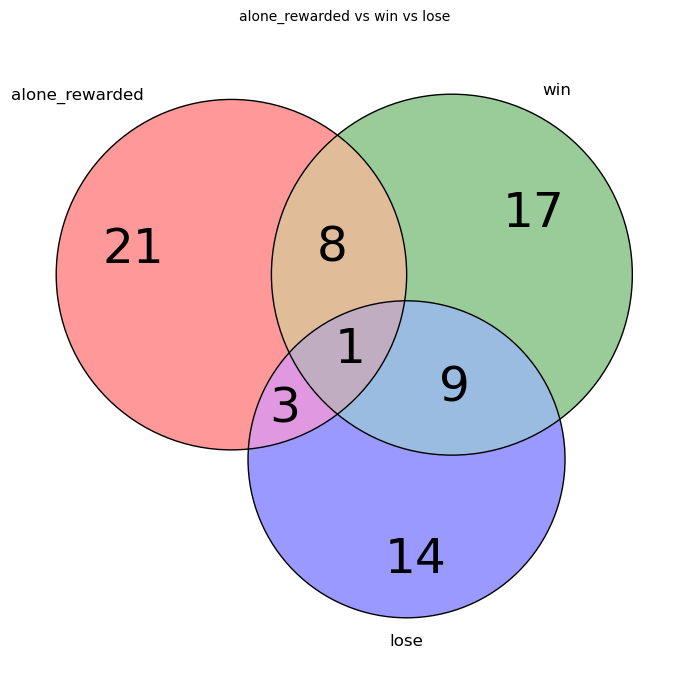

In [10]:
# Example 1: Compare 'alone_rewarded', 'win', and 'lose' events (your specific example)
print("EXAMPLE 1: Alone Rewarded vs Win vs Lose Events")
events_to_compare = ['alone_rewarded', 'win', 'lose']
_ = create_venn_diagram(units_df, events_to_compare, significance_type='both', 
                        title="All Significant Units");

In [11]:
hc_df = units_df[units_df['Event name'] == 'high_comp_win'].copy()
hc_df.head()
print(len(hc_df))

25


### Problem, even though it says both for sig type it only have increase

In [12]:
hc_df_increasing = hc_df[hc_df['sig'] == 'increase']
hc_df_decreasing = hc_df[hc_df['sig'] == 'decrease']

print(f"Number of increasing units for high_comp_win: {len(hc_df_increasing)}")
print(f"Number of decreasing units for high_comp_win: {len(hc_df_decreasing)}")

Number of increasing units for high_comp_win: 21
Number of decreasing units for high_comp_win: 4


In [13]:
significant_units = hc_df[hc_df['sig'].isin(['increase', 'decrease'])]['Unit number'].unique()
print(f"Number of significant units for high_comp_win: {len(significant_units)}")


Number of significant units for high_comp_win: 22


Significant units for increase: [52, 61, 479, 513, 102, 108, 187, 272, 274, 7, 82, 84, 98, 8, 24]
Significant units for decrease: [14, 33, 38, 13]
All significant units: [52, 61, 14, 479, 513, 102, 108, 187, 272, 274, 7, 82, 84, 33, 38, 98, 13, 8, 24]
low_comp_win: 19 significant units
Significant units for increase: [21, 187, 272, 262, 3, 4, 7]
Significant units for decrease: []
All significant units: [21, 187, 272, 262, 3, 4, 7]
low_comp_lose: 7 significant units
Significant units for overlap: {'20230619_subj_1-4_t3b3L_box2_Unit187', '20230619_subj_1-4_t3b3L_box2_Unit272'}

Overlap between low_comp_win and low_comp_lose: 2 units
units in low_comp_win: {'20240323_subj_4-2_t5b5_Unit24', '20240318_subj_3-4_t5b5_Unit38', '20240322_subj_3-4_t5b5_Unit8', '20230621_subj_1-4_t3b3L_box1_Unit7', '20230613_subj_1-1_t1b2L_box1_Unit513', '20230619_subj_1-4_t3b3L_box2_Unit272', '20230621_subj_1-4_t3b3L_box1_Unit84', '20230613_subj_1-1_t1b2L_box1_Unit479', '20230616_subj_1-4_t4b3L_box1_Unit108', '2

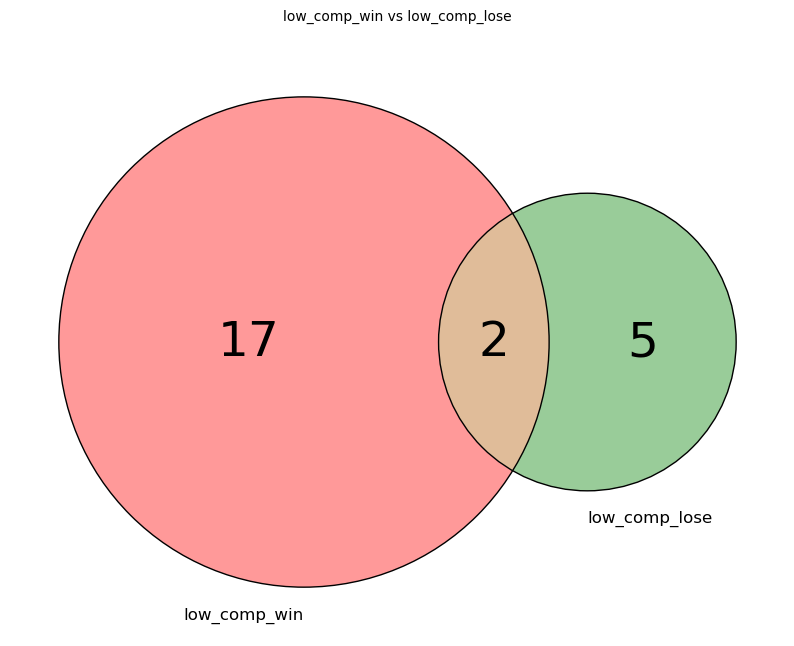

In [14]:
_ = create_venn_diagram(units_df, ['low_comp_win', 'low_comp_lose'], significance_type='both');


EXAMPLE 2: High Competition Win vs Lose
Significant units for increase: [232, 52, 86, 118, 6, 23, 53, 64, 59, 19, 90, 101, 113, 158, 166, 248, 106, 101, 47, 101, 4]
Significant units for decrease: [33, 62, 8, 4]
All significant units: [232, 52, 86, 118, 6, 23, 53, 64, 59, 19, 90, 101, 33, 113, 158, 166, 248, 106, 62, 101, 47, 8, 101, 4, 4]
high_comp_win: 25 significant units
Significant units for increase: [211, 52, 107, 20, 4, 6, 80, 108, 109, 23, 5, 76, 103, 19, 87, 187, 263, 272, 274, 275, 17, 82, 84, 87, 101, 23, 6, 4, 75]
Significant units for decrease: [262, 36, 80]
All significant units: [211, 52, 107, 20, 4, 6, 80, 108, 109, 23, 5, 76, 103, 19, 87, 187, 262, 263, 272, 274, 275, 17, 36, 82, 84, 87, 101, 23, 6, 4, 80, 75]
high_comp_lose: 32 significant units
Significant units for overlap: {'20240317_subj_4-3_t5b5_Unit101', '20230616_subj_1-4_t4b3L_box1_Unit23', '20230614_subj_1-1_t1b3L_box1_Unit6', '20230618_subj_1-4_t4b3L_box1_Unit19', '20240323_subj_3-1_t5b5_Unit4', '20230612_

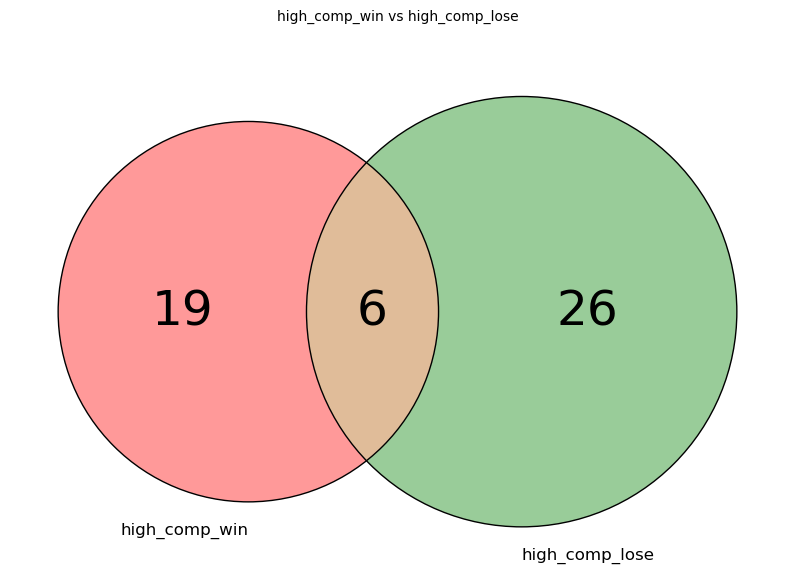

In [15]:
# Example 2: Compare high competition win vs lose (2-way comparison)
print("\nEXAMPLE 2: High Competition Win vs Lose")
high_comp_events = ['high_comp_win', 'high_comp_lose']
_ = create_venn_diagram(units_df, high_comp_events, significance_type='both');


EXAMPLE 3: High vs Low Competition - Increasing Units Only
Significant units for increase: [232, 65, 52, 107, 20, 4, 6, 108, 109, 23, 64, 35, 103, 19, 187, 263, 272, 274, 275, 17, 82, 84, 87, 101, 6, 113, 166, 248, 106, 101, 4, 75]
Significant units for decrease: [7, 262, 36, 46, 33, 62, 80]
All significant units: [232, 65, 52, 107, 20, 4, 6, 108, 109, 23, 64, 7, 35, 103, 19, 187, 262, 263, 272, 274, 275, 17, 36, 82, 84, 87, 101, 46, 6, 33, 113, 166, 248, 106, 62, 101, 4, 80, 75]
high_comp: 39 significant units
Significant units for increase: [61, 68, 513, 21, 108, 30, 187, 272, 274, 262, 82, 84, 8, 7, 24]
Significant units for decrease: [132, 33, 38, 13]
All significant units: [61, 68, 513, 21, 108, 30, 132, 187, 272, 274, 262, 82, 84, 33, 38, 13, 8, 7, 24]
low_comp: 19 significant units
Significant units for overlap: {'20230619_subj_1-4_t3b3L_box2_Unit187', '20230621_subj_1-4_t3b3L_box1_Unit82', '20230619_subj_1-4_t3b3L_box2_Unit272', '20230621_subj_1-4_t3b3L_box1_Unit84', '20230619

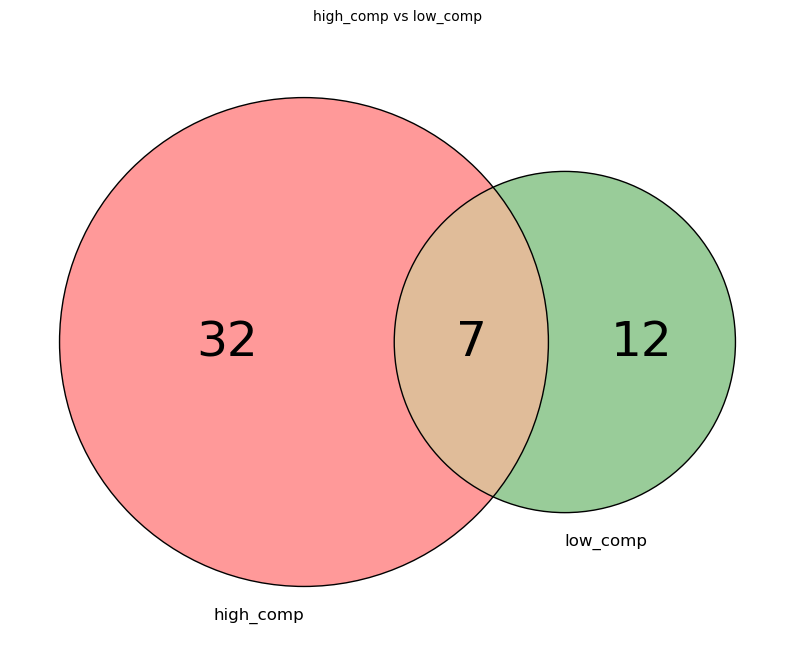

In [16]:
# Example 3: Look at only INCREASING units for competition events
print("\nEXAMPLE 3: High vs Low Competition - Increasing Units Only")
competition_events = ['high_comp', 'low_comp']
_ = create_venn_diagram(units_df, competition_events, significance_type='both');

In [ ]:
_ = create_venn_diagram(units_df, ['win', 'low_comp_win', 'high_comp_win'], significance_type='both', title="All Significant Units");
_ = create_venn_diagram(units_df, ['lose', 'low_comp_win', 'high_comp_win'], significance_type='both', title="All Significant Units");
_ = create_venn_diagram(units_df, ['win', 'low_comp_win', 'high_comp_win'], significance_type='both', title="All Significant Units");
_ = create_venn_diagram(units_df, ['win', 'low_comp_win', 'high_comp_win'], significance_type='both', title="All Significant Units");


Significant units for increase: [232, 52, 61, 481, 118, 102, 104, 108, 23, 64, 59, 19, 187, 272, 274, 7, 82, 84, 90, 101, 113, 158, 166, 248, 106, 101, 47, 101, 183, 24]
Significant units for decrease: [14, 46, 33, 13, 4]
All significant units: [232, 52, 61, 14, 481, 118, 102, 104, 108, 23, 64, 59, 19, 187, 272, 274, 7, 82, 84, 90, 101, 46, 33, 113, 158, 166, 248, 106, 13, 101, 47, 101, 183, 4, 24]
win: 35 significant units
Significant units for increase: [14, 107, 20, 4, 6, 80, 180, 108, 109, 103, 19, 187, 263, 272, 274, 275, 82, 84, 87, 101, 23, 136, 4, 4, 75]
Significant units for decrease: [132, 80]
All significant units: [14, 107, 20, 4, 6, 80, 180, 108, 109, 103, 19, 132, 187, 263, 272, 274, 275, 82, 84, 87, 101, 23, 136, 4, 80, 4, 75]
lose: 27 significant units
Significant units for overlap: {'20230619_subj_1-4_t3b3L_box2_Unit187', '20230621_subj_1-4_t3b3L_box1_Unit82', '20240317_subj_4-3_t5b5_Unit101', '20230619_subj_1-4_t3b3L_box2_Unit272', '20230618_subj_1-4_t4b3L_box1_Unit19

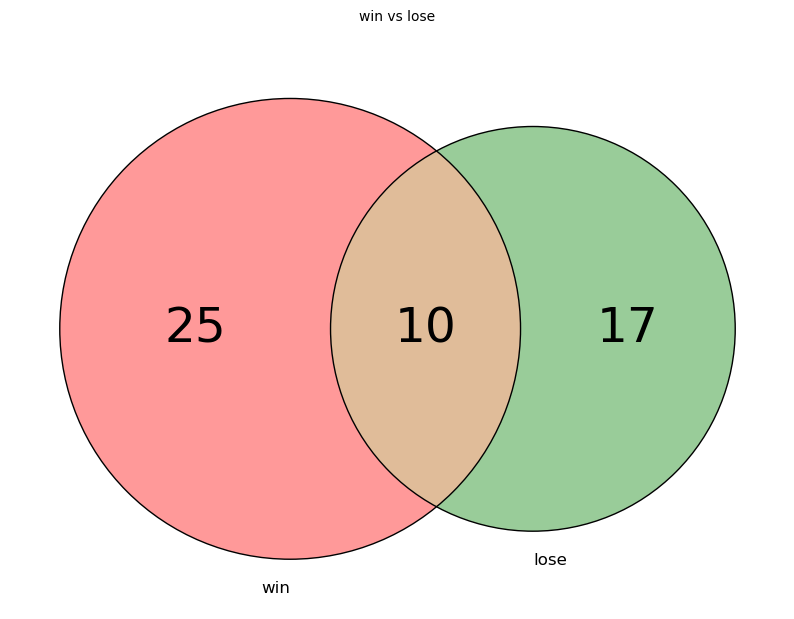

In [17]:
_ = create_venn_diagram(units_df, ['win', 'lose'], significance_type='both', title="All Significant Units");

# overlap units: 6\, 74\, 80\, *87\, *187\, *19\, 23\ (2 in increase?), *109\, 68\, 30\

## Weird Problem, shows an overlap of 10 but there's only an overlap of 6 when you look at it seperately.
- Look for yourself what the unique values in lose and win is for both
- then look to see how many are increase and how many are decrease, count them and see what's missing

Significant units for increase: [232, 52, 61, 481, 118, 102, 104, 108, 23, 64, 59, 19, 187, 272, 274, 7, 82, 84, 90, 101, 113, 158, 166, 248, 106, 101, 47, 101, 183, 24]
win: 30 significant units
Significant units for increase: [14, 107, 20, 4, 6, 80, 180, 108, 109, 103, 19, 187, 263, 272, 274, 275, 82, 84, 87, 101, 23, 136, 4, 4, 75]
lose: 25 significant units
Significant units for overlap: {'20230619_subj_1-4_t3b3L_box2_Unit187', '20230621_subj_1-4_t3b3L_box1_Unit82', '20240317_subj_4-3_t5b5_Unit101', '20230619_subj_1-4_t3b3L_box2_Unit272', '20230618_subj_1-4_t4b3L_box1_Unit19', '20230621_subj_1-4_t3b3L_box1_Unit84', '20230619_subj_1-4_t3b3L_box2_Unit274', '20230616_subj_1-4_t4b3L_box1_Unit108'}

Overlap between win and lose: 8 units
units in win: {'20230616_subj_1-4_t4b3L_box1_Unit64', '20240322_subj_4-3_t6b6_Unit101', '20240323_subj_4-2_t5b5_Unit24', '20230616_subj_1-4_t4b3L_box1_Unit23', '20230618_subj_1-4_t4b3L_box1_Unit19', '20230621_subj_1-4_t3b3L_box1_Unit7', '20240320_subj_5-

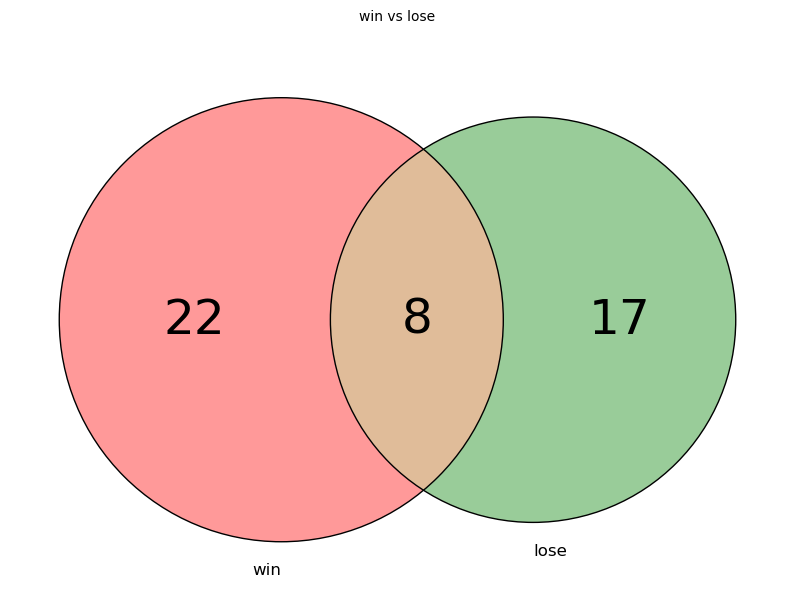

Significant units for decrease: [14, 46, 33, 13, 4]
win: 5 significant units
Significant units for decrease: [132, 80]
lose: 2 significant units
Significant units for overlap: set()

Overlap between win and lose: 0 units
units in win: {'20240320_subj_4-3_t5b5_Unit13', '20240317_subj_4-3_t5b5_Unit46', '20240323_subj_3-4_t6b6_Unit4', '20230612_subj_1-2_t2b2L_box1_Unit14', '20240318_subj_3-4_t5b5_Unit33'}
units in lose: {'20240323_subj_3-1_t5b5_Unit80', '20230619_subj_1-4_t3b3L_box2_Unit132'}


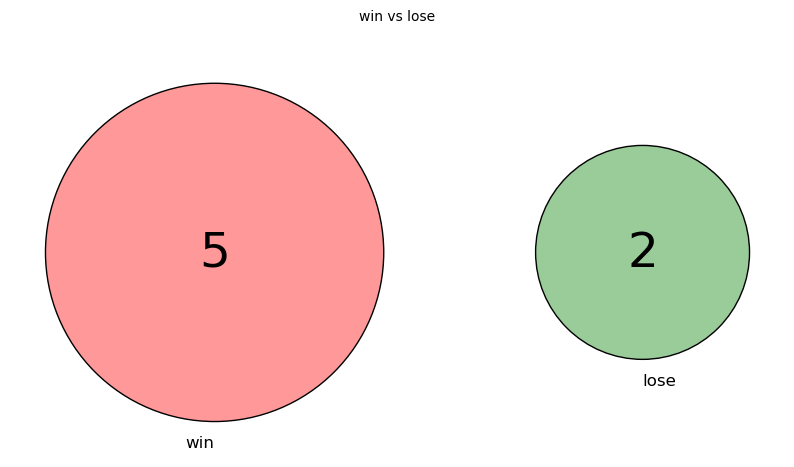

In [18]:
_ = create_venn_diagram(units_df, ['win', 'lose'], significance_type='increase', title="All Significant Units");
_ = create_venn_diagram(units_df, ['win', 'lose'], significance_type='decrease', title="All Significant Units");

# earlier overlap units: 6\, 74\, 80\, *87\, *187\, *19\, 23\ (2 in increase?), *109\, 68\, 30\
# Increasing overlap units: 6, 74 (2 in lose), 80, 23, 68, 30

# 87 exists in both and both increases but not in overlap plot?

# 20230621_111240_standard_comp_to_omission_D5_subj_1-4_t3b3L_box1_merged.rec__Unit87
# 20230619_115321_standard_comp_to_omission_D3_subj_1-4_t3b3L_box2_merged.rec__Unit87


EXAMPLE 4: Batch Analysis of Multiple Comparisons

ANALYSIS 1: high_comp_win vs low_comp_win (2 events)
Significant units for increase: [232, 52, 86, 118, 6, 23, 53, 64, 59, 19, 90, 101, 113, 158, 166, 248, 106, 101, 47, 101, 4]
Significant units for decrease: [33, 62, 8, 4]
All significant units: [232, 52, 86, 118, 6, 23, 53, 64, 59, 19, 90, 101, 33, 113, 158, 166, 248, 106, 62, 101, 47, 8, 101, 4, 4]
high_comp_win: 25 significant units
Significant units for increase: [52, 61, 479, 513, 102, 108, 187, 272, 274, 7, 82, 84, 98, 8, 24]
Significant units for decrease: [14, 33, 38, 13]
All significant units: [52, 61, 14, 479, 513, 102, 108, 187, 272, 274, 7, 82, 84, 33, 38, 98, 13, 8, 24]
low_comp_win: 19 significant units
Significant units for overlap: {'20230612_subj_1-4_t4b2L_box1_Unit52', '20240322_subj_3-4_t5b5_Unit8', '20240318_subj_3-4_t5b5_Unit33'}

Overlap between high_comp_win and low_comp_win: 3 units
units in high_comp_win: {'20230616_subj_1-4_t4b3L_box1_Unit64', '20240322_sub

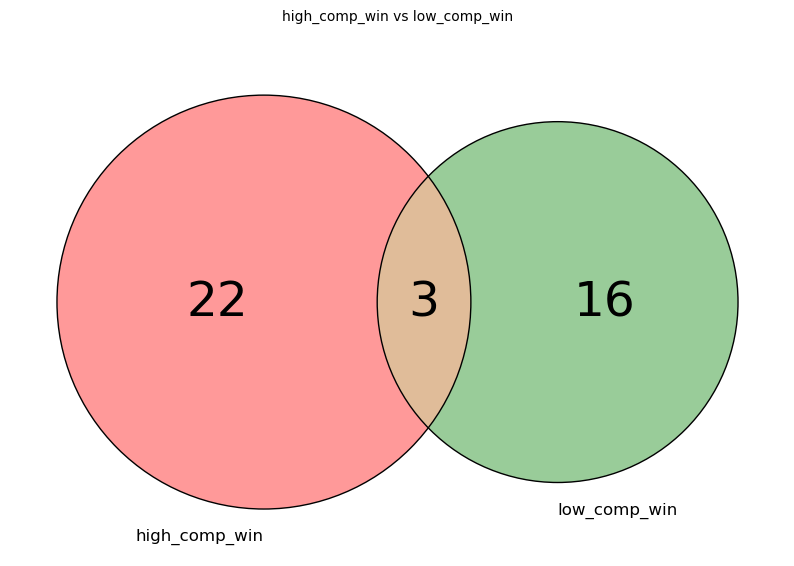


ANALYSIS 2: high_comp_lose vs low_comp_lose (2 events)
Significant units for increase: [211, 52, 107, 20, 4, 6, 80, 108, 109, 23, 5, 76, 103, 19, 87, 187, 263, 272, 274, 275, 17, 82, 84, 87, 101, 23, 6, 4, 75]
Significant units for decrease: [262, 36, 80]
All significant units: [211, 52, 107, 20, 4, 6, 80, 108, 109, 23, 5, 76, 103, 19, 87, 187, 262, 263, 272, 274, 275, 17, 36, 82, 84, 87, 101, 23, 6, 4, 80, 75]
high_comp_lose: 32 significant units
Significant units for increase: [21, 187, 272, 262, 3, 4, 7]
Significant units for decrease: []
All significant units: [21, 187, 272, 262, 3, 4, 7]
low_comp_lose: 7 significant units
Significant units for overlap: {'20230619_subj_1-4_t3b3L_box2_Unit187', '20230619_subj_1-4_t3b3L_box2_Unit272'}

Overlap between high_comp_lose and low_comp_lose: 2 units
units in high_comp_lose: {'20240323_subj_3-1_t5b5_Unit80', '20230613_subj_1-4_t4b3L_box2_Unit20', '20240318_subj_3-3_t6b6_Unit6', '20230616_subj_1-4_t4b3L_box1_Unit23', '20230618_subj_1-4_t4b3L

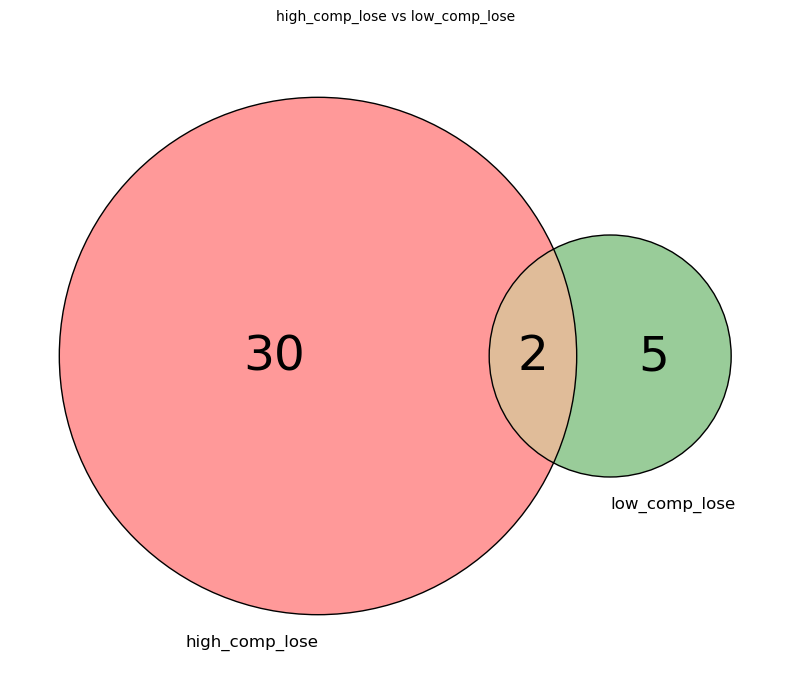


ANALYSIS 3: alone_rewarded vs high_comp vs low_comp (3 events)
Significant units for increase: [232, 12, 52, 68, 481, 513, 10, 107, 181, 190, 34, 4, 44, 6, 104, 108, 23, 64, 80, 136, 3, 183, 25]
Significant units for decrease: [15, 38, 403, 12, 195, 33, 111, 7, 13, 18]
All significant units: [232, 12, 15, 52, 68, 38, 403, 481, 513, 10, 107, 12, 181, 190, 195, 33, 34, 4, 44, 6, 104, 108, 111, 23, 64, 7, 80, 136, 13, 3, 183, 25, 18]
alone_rewarded: 33 significant units
Significant units for increase: [232, 65, 52, 107, 20, 4, 6, 108, 109, 23, 64, 35, 103, 19, 187, 263, 272, 274, 275, 17, 82, 84, 87, 101, 6, 113, 166, 248, 106, 101, 4, 75]
Significant units for decrease: [7, 262, 36, 46, 33, 62, 80]
All significant units: [232, 65, 52, 107, 20, 4, 6, 108, 109, 23, 64, 7, 35, 103, 19, 187, 262, 263, 272, 274, 275, 17, 36, 82, 84, 87, 101, 46, 6, 33, 113, 166, 248, 106, 62, 101, 4, 80, 75]
high_comp: 39 significant units
Significant units for increase: [61, 68, 513, 21, 108, 30, 187, 272, 

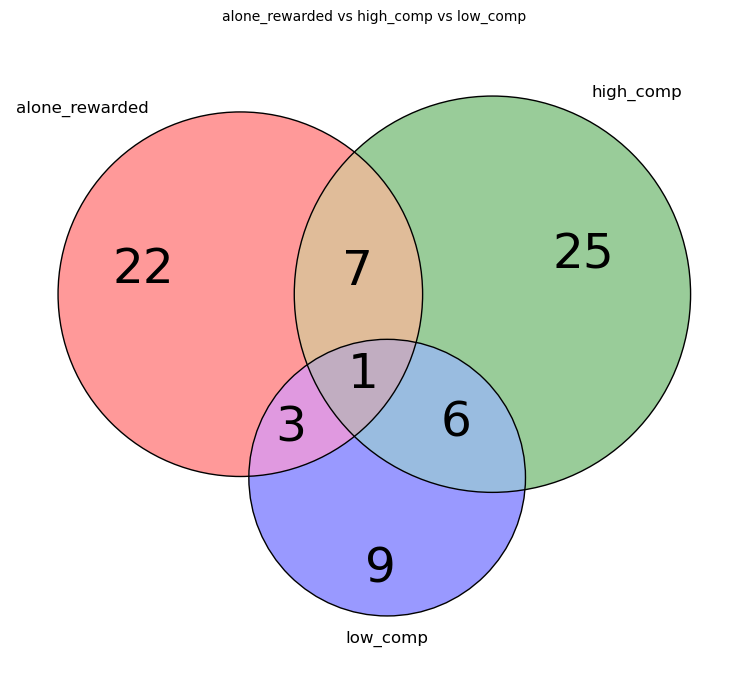

In [19]:
# Example 4: Batch analysis of multiple event groups
print("\nEXAMPLE 4: Batch Analysis of Multiple Comparisons")

event_comparisons = [
    ['high_comp_win', 'low_comp_win'],  # Win conditions
    ['high_comp_lose', 'low_comp_lose'], # Lose conditions
    ['alone_rewarded', 'high_comp', 'low_comp']  # All main reward conditions
]

analyze_event_overlap(units_df, event_comparisons, significance_type='both')


EXAMPLE 7: All Non-Baseline Events (7 events)
Significant units for increase: [232, 12, 52, 68, 481, 513, 10, 107, 181, 190, 34, 4, 44, 6, 104, 108, 23, 64, 80, 136, 3, 183, 25]
Significant units for decrease: [15, 38, 403, 12, 195, 33, 111, 7, 13, 18]
All significant units: [232, 12, 15, 52, 68, 38, 403, 481, 513, 10, 107, 12, 181, 190, 195, 33, 34, 4, 44, 6, 104, 108, 111, 23, 64, 7, 80, 136, 13, 3, 183, 25, 18]
alone_rewarded: 33 significant units
Significant units for increase: [232, 65, 52, 107, 20, 4, 6, 108, 109, 23, 64, 35, 103, 19, 187, 263, 272, 274, 275, 17, 82, 84, 87, 101, 6, 113, 166, 248, 106, 101, 4, 75]
Significant units for decrease: [7, 262, 36, 46, 33, 62, 80]
All significant units: [232, 65, 52, 107, 20, 4, 6, 108, 109, 23, 64, 7, 35, 103, 19, 187, 262, 263, 272, 274, 275, 17, 36, 82, 84, 87, 101, 46, 6, 33, 113, 166, 248, 106, 62, 101, 4, 80, 75]
high_comp: 39 significant units
Significant units for increase: [211, 52, 107, 20, 4, 6, 80, 108, 109, 23, 5, 76, 103,

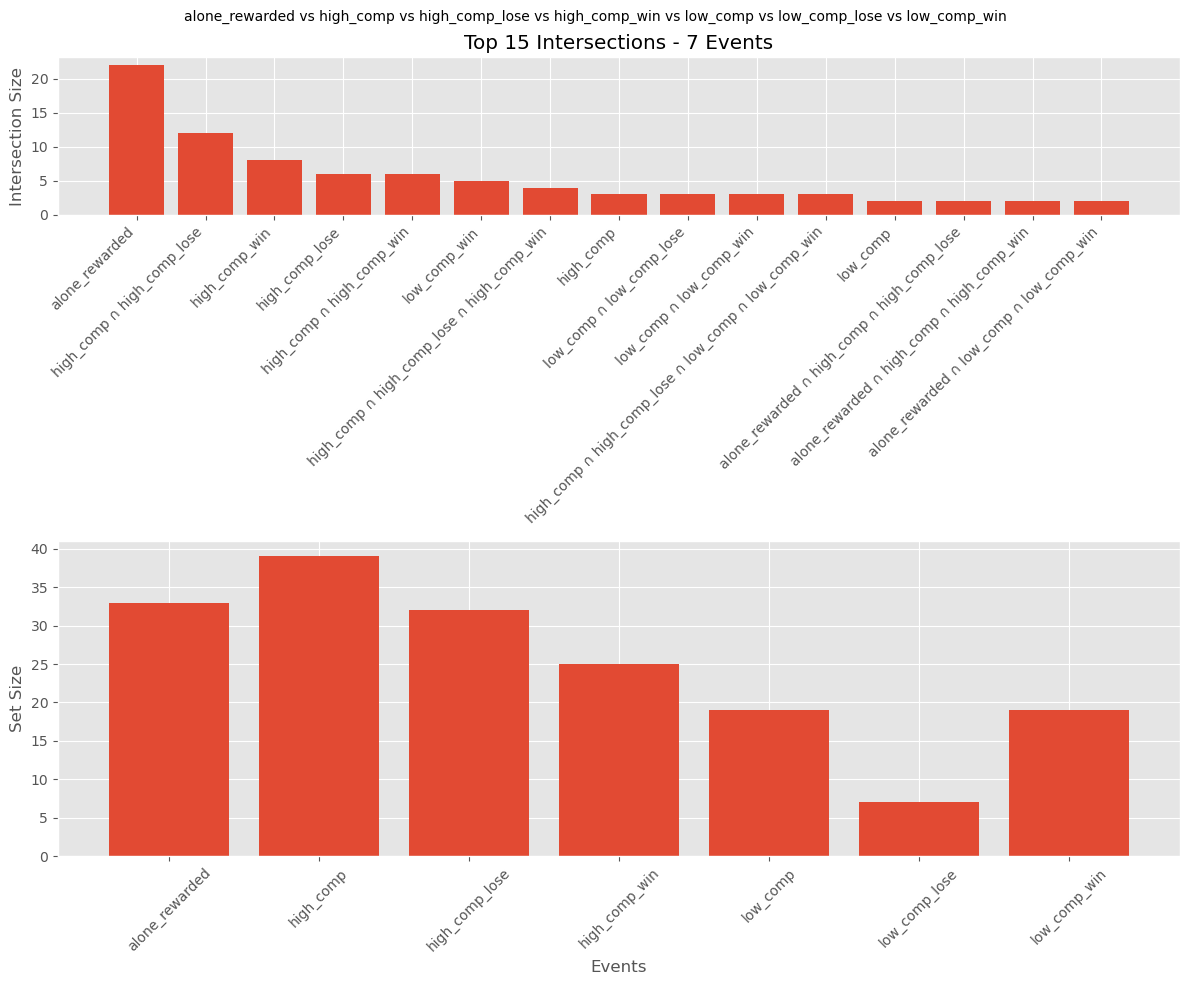


=== DETAILED OVERLAP STATISTICS ===
Total unique units across all events: 94
Individual event sizes: {'alone_rewarded': 33, 'high_comp': 39, 'high_comp_lose': 32, 'high_comp_win': 25, 'low_comp': 19, 'low_comp_lose': 7, 'low_comp_win': 19}

Top 10 intersections:
  1. alone_rewarded: 22 units
  2. high_comp ∩ high_comp_lose: 12 units
  3. high_comp_win: 8 units
  4. high_comp_lose: 6 units
  5. high_comp ∩ high_comp_win: 6 units
  6. low_comp_win: 5 units
  7. high_comp ∩ high_comp_lose ∩ high_comp_win: 4 units
  8. high_comp: 3 units
  9. low_comp ∩ low_comp_lose: 3 units
  10. low_comp ∩ low_comp_win: 3 units

Pairwise overlaps:
  alone_rewarded & high_comp: 8 units
  alone_rewarded & high_comp_lose: 5 units
  alone_rewarded & high_comp_win: 4 units
  alone_rewarded & low_comp: 4 units
  alone_rewarded & low_comp_lose: 0 units
  alone_rewarded & low_comp_win: 4 units
  high_comp & high_comp_lose: 26 units
  high_comp & high_comp_win: 15 units
  high_comp & low_comp: 7 units
  high_co

In [20]:
# Example 7: Comprehensive analysis - all non-baseline events
print("\nEXAMPLE 7: All Non-Baseline Events (7 events)")
all_main_events = [
    'alone_rewarded', 'high_comp', 'high_comp_lose', 'high_comp_win', 
    'low_comp', 'low_comp_lose', 'low_comp_win'
]
_ = create_overlap_visualization(units_df, all_main_events, significance_type='both');


EXAMPLE 8: Mixed Batch Analysis (2, 3, 4-way Venn and 5+ UpSet comparisons)

ANALYSIS 1: high_comp_win vs low_comp_win (2 events)
Significant units for increase: [232, 52, 86, 118, 6, 23, 53, 64, 59, 19, 90, 101, 113, 158, 166, 248, 106, 101, 47, 101, 4]
Significant units for decrease: [33, 62, 8, 4]
All significant units: [232, 52, 86, 118, 6, 23, 53, 64, 59, 19, 90, 101, 33, 113, 158, 166, 248, 106, 62, 101, 47, 8, 101, 4, 4]
high_comp_win: 25 significant units
Significant units for increase: [52, 61, 479, 513, 102, 108, 187, 272, 274, 7, 82, 84, 98, 8, 24]
Significant units for decrease: [14, 33, 38, 13]
All significant units: [52, 61, 14, 479, 513, 102, 108, 187, 272, 274, 7, 82, 84, 33, 38, 98, 13, 8, 24]
low_comp_win: 19 significant units
Significant units for overlap: {'20230612_subj_1-4_t4b2L_box1_Unit52', '20240322_subj_3-4_t5b5_Unit8', '20240318_subj_3-4_t5b5_Unit33'}

Overlap between high_comp_win and low_comp_win: 3 units
units in high_comp_win: {'20230616_subj_1-4_t4b3L_b

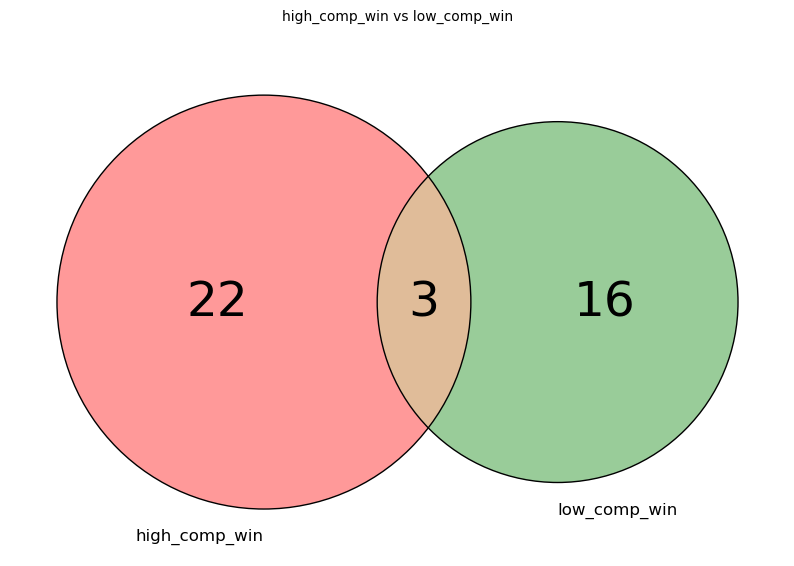


ANALYSIS 2: alone_rewarded vs win vs lose (3 events)
Significant units for increase: [232, 12, 52, 68, 481, 513, 10, 107, 181, 190, 34, 4, 44, 6, 104, 108, 23, 64, 80, 136, 3, 183, 25]
Significant units for decrease: [15, 38, 403, 12, 195, 33, 111, 7, 13, 18]
All significant units: [232, 12, 15, 52, 68, 38, 403, 481, 513, 10, 107, 12, 181, 190, 195, 33, 34, 4, 44, 6, 104, 108, 111, 23, 64, 7, 80, 136, 13, 3, 183, 25, 18]
alone_rewarded: 33 significant units
Significant units for increase: [232, 52, 61, 481, 118, 102, 104, 108, 23, 64, 59, 19, 187, 272, 274, 7, 82, 84, 90, 101, 113, 158, 166, 248, 106, 101, 47, 101, 183, 24]
Significant units for decrease: [14, 46, 33, 13, 4]
All significant units: [232, 52, 61, 14, 481, 118, 102, 104, 108, 23, 64, 59, 19, 187, 272, 274, 7, 82, 84, 90, 101, 46, 33, 113, 158, 166, 248, 106, 13, 101, 47, 101, 183, 4, 24]
win: 35 significant units
Significant units for increase: [14, 107, 20, 4, 6, 80, 180, 108, 109, 103, 19, 187, 263, 272, 274, 275, 82, 

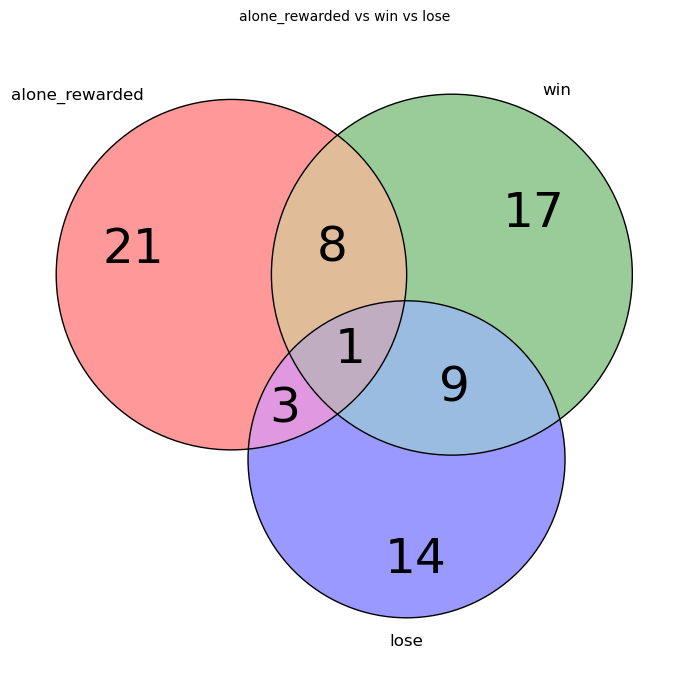


ANALYSIS 3: high_comp_win vs high_comp_lose vs low_comp_win vs low_comp_lose (4 events)
Significant units for increase: [232, 52, 86, 118, 6, 23, 53, 64, 59, 19, 90, 101, 113, 158, 166, 248, 106, 101, 47, 101, 4]
Significant units for decrease: [33, 62, 8, 4]
All significant units: [232, 52, 86, 118, 6, 23, 53, 64, 59, 19, 90, 101, 33, 113, 158, 166, 248, 106, 62, 101, 47, 8, 101, 4, 4]
high_comp_win: 25 significant units
Significant units for increase: [211, 52, 107, 20, 4, 6, 80, 108, 109, 23, 5, 76, 103, 19, 87, 187, 263, 272, 274, 275, 17, 82, 84, 87, 101, 23, 6, 4, 75]
Significant units for decrease: [262, 36, 80]
All significant units: [211, 52, 107, 20, 4, 6, 80, 108, 109, 23, 5, 76, 103, 19, 87, 187, 262, 263, 272, 274, 275, 17, 36, 82, 84, 87, 101, 23, 6, 4, 80, 75]
high_comp_lose: 32 significant units
Significant units for increase: [52, 61, 479, 513, 102, 108, 187, 272, 274, 7, 82, 84, 98, 8, 24]
Significant units for decrease: [14, 33, 38, 13]
All significant units: [52, 6

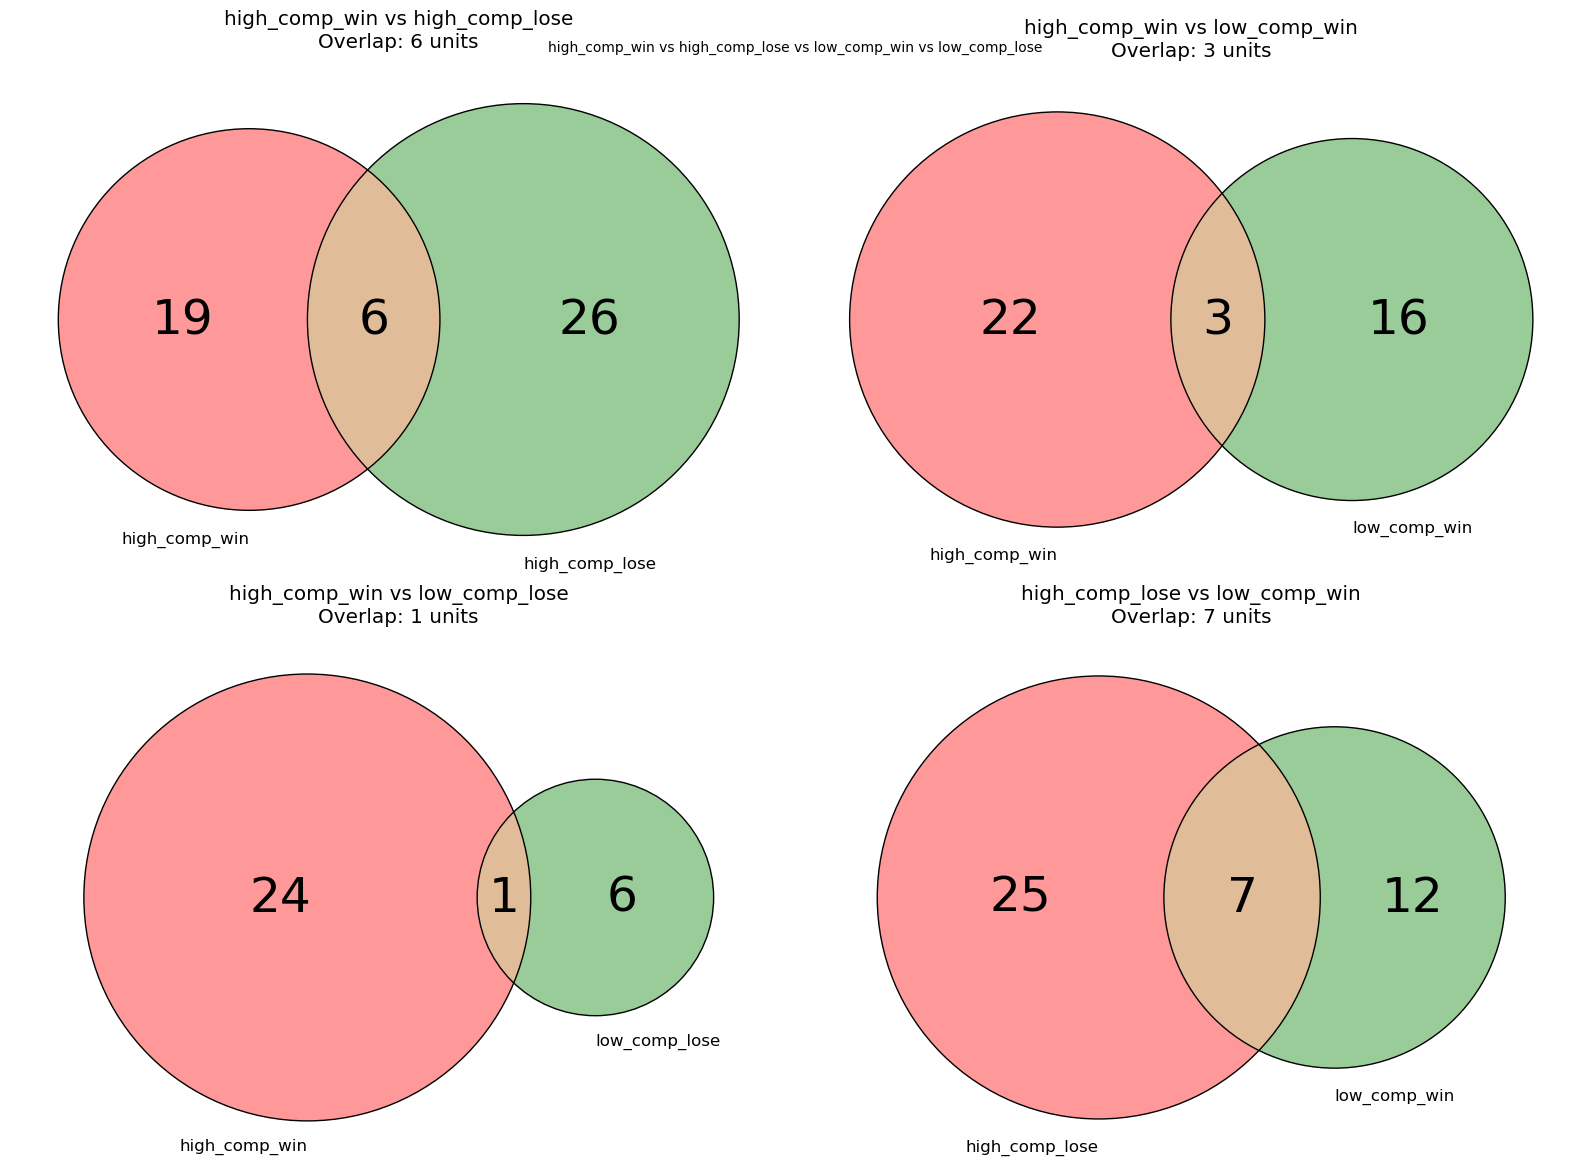


ANALYSIS 4: alone_rewarded vs high_comp vs low_comp vs win vs lose (5 events)
Significant units for increase: [232, 12, 52, 68, 481, 513, 10, 107, 181, 190, 34, 4, 44, 6, 104, 108, 23, 64, 80, 136, 3, 183, 25]
Significant units for decrease: [15, 38, 403, 12, 195, 33, 111, 7, 13, 18]
All significant units: [232, 12, 15, 52, 68, 38, 403, 481, 513, 10, 107, 12, 181, 190, 195, 33, 34, 4, 44, 6, 104, 108, 111, 23, 64, 7, 80, 136, 13, 3, 183, 25, 18]
alone_rewarded: 33 significant units
Significant units for increase: [232, 65, 52, 107, 20, 4, 6, 108, 109, 23, 64, 35, 103, 19, 187, 263, 272, 274, 275, 17, 82, 84, 87, 101, 6, 113, 166, 248, 106, 101, 4, 75]
Significant units for decrease: [7, 262, 36, 46, 33, 62, 80]
All significant units: [232, 65, 52, 107, 20, 4, 6, 108, 109, 23, 64, 7, 35, 103, 19, 187, 262, 263, 272, 274, 275, 17, 36, 82, 84, 87, 101, 46, 6, 33, 113, 166, 248, 106, 62, 101, 4, 80, 75]
high_comp: 39 significant units
Significant units for increase: [61, 68, 513, 21, 108,

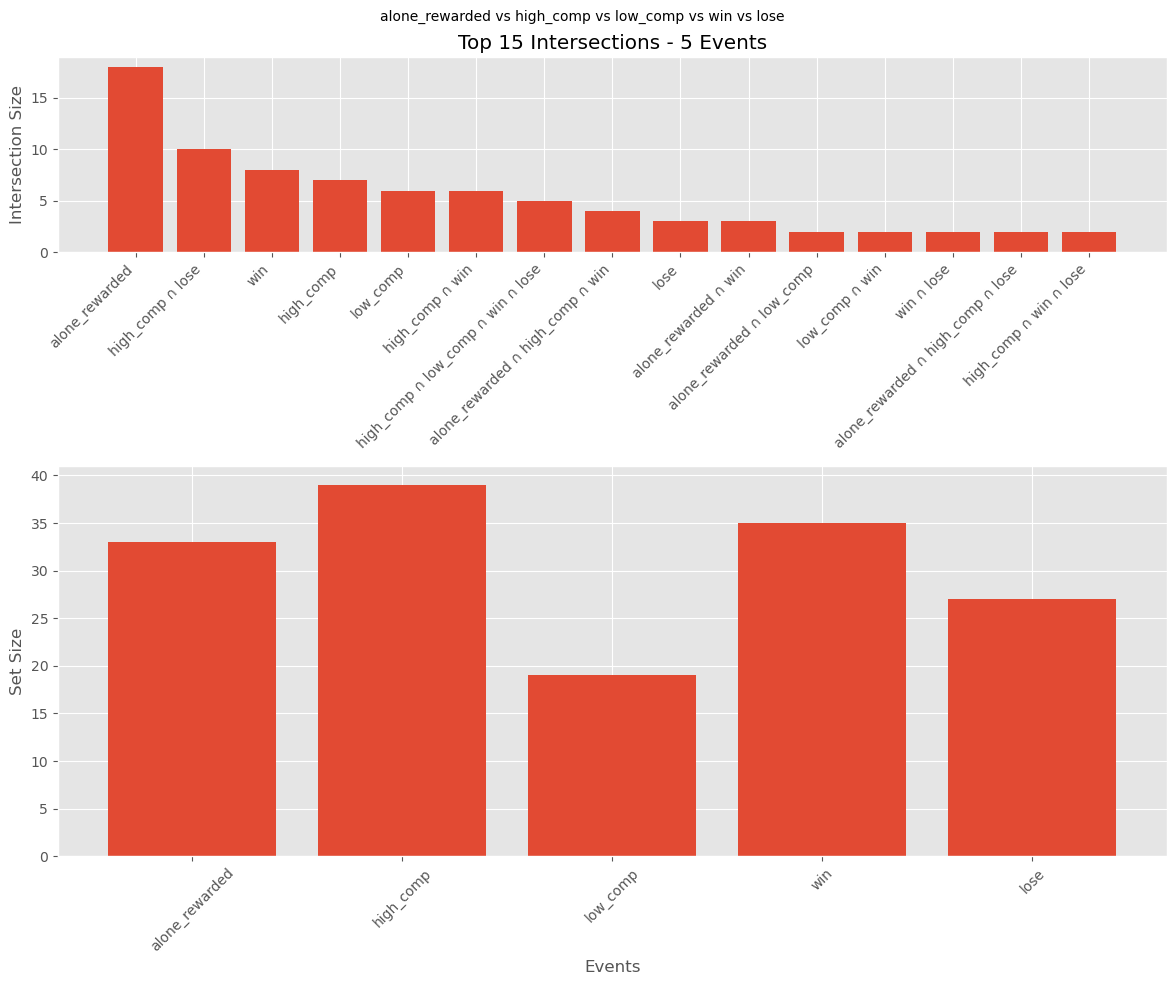


=== DETAILED OVERLAP STATISTICS ===
Total unique units across all events: 86
Individual event sizes: {'alone_rewarded': 33, 'high_comp': 39, 'low_comp': 19, 'win': 35, 'lose': 27}

Top 10 intersections:
  1. alone_rewarded: 18 units
  2. high_comp ∩ lose: 10 units
  3. win: 8 units
  4. high_comp: 7 units
  5. low_comp: 6 units
  6. high_comp ∩ win: 6 units
  7. high_comp ∩ low_comp ∩ win ∩ lose: 5 units
  8. alone_rewarded ∩ high_comp ∩ win: 4 units
  9. lose: 3 units
  10. alone_rewarded ∩ win: 3 units

Pairwise overlaps:
  alone_rewarded & high_comp: 8 units
  alone_rewarded & low_comp: 4 units
  alone_rewarded & win: 9 units
  alone_rewarded & lose: 4 units
  high_comp & low_comp: 7 units
  high_comp & win: 19 units
  high_comp & lose: 20 units
  low_comp & win: 10 units
  low_comp & lose: 7 units
  win & lose: 10 units


In [21]:
# Example 8: Updated batch analysis with mixed 2, 3, 4-way Venn and 5+ UpSet comparisons
print("\nEXAMPLE 8: Mixed Batch Analysis (2, 3, 4-way Venn and 5+ UpSet comparisons)")

mixed_event_comparisons = [
    ['high_comp_win', 'low_comp_win'],  # 2-way (Venn)
    ['alone_rewarded', 'win', 'lose'], # 3-way (Venn)
    ['high_comp_win', 'high_comp_lose', 'low_comp_win', 'low_comp_lose'], # 4-way (Venn)
    ['alone_rewarded', 'high_comp', 'low_comp', 'win', 'lose'] # 5-way (UpSet)
]

analyze_event_overlap(units_df, mixed_event_comparisons, significance_type='both')

In [22]:
# Filter dataframes by day using the 'Recording' col 
# Recording format: 20230621_111240_standard_comp_to_omission_D5_subj_1-4_t3b3L_box1_merged.rec
# We'll filter by D1, D2, D3, D4, D5, etc.

import re

# Extract day numbers from Recording column (D1, D2, D3, etc.)
units_df['Day'] = units_df['Recording'].str.extract(r'_D(\d+)_')

# Check what days we have - filter out NaN values properly
unique_days = units_df['Day'].dropna().unique()
print("Unique days found:")
for day in sorted(unique_days):
    count = len(units_df[units_df['Day'] == day])
    print(f"  D{day}: {count} rows")

print(f"\nTotal unique days: {len(unique_days)}")

Unique days found:
  D1: 29 rows
  D2: 36 rows
  D3: 40 rows
  D4: 32 rows
  D5: 22 rows

Total unique days: 5


In [23]:
# Create separate dataframes for each day
day_dataframes = {}
valid_days = units_df['Day'].dropna().unique()

for day in sorted(valid_days):
    # Create dataframe for this specific day
    day_df = units_df[units_df['Day'] == day].copy()
    day_dataframes[f'D{day}'] = day_df
    
    print(f"D{day} dataframe:")
    print(f"  Rows: {len(day_df)}")
    print(f"  Unique units: {len(day_df['Unit number'].unique())}")
    print(f"  Events: {sorted(day_df['Event name'].unique())}")
    print()

print("Day dataframes created:")
for day_name, df in day_dataframes.items():
    print(f"  {day_name}: {len(df)} rows")
    
# Store individual day dataframes for easy access
if 'D1' in day_dataframes: D1_df = day_dataframes['D1']
if 'D2' in day_dataframes: D2_df = day_dataframes['D2']
if 'D3' in day_dataframes: D3_df = day_dataframes['D3']
if 'D4' in day_dataframes: D4_df = day_dataframes['D4']
if 'D5' in day_dataframes: D5_df = day_dataframes['D5']

D1 dataframe:
  Rows: 29
  Unique units: 15
  Events: ['alone_rewarded', 'high_comp', 'high_comp_lose', 'high_comp_win', 'lose', 'low_comp', 'low_comp_win', 'win']

D2 dataframe:
  Rows: 36
  Unique units: 19
  Events: ['alone_rewarded', 'high_comp', 'high_comp_lose', 'high_comp_win', 'lose', 'low_comp', 'low_comp_win', 'win']

D3 dataframe:
  Rows: 40
  Unique units: 11
  Events: ['high_comp', 'high_comp_lose', 'high_comp_win', 'lose', 'low_comp', 'low_comp_lose', 'low_comp_win', 'win']

D4 dataframe:
  Rows: 32
  Unique units: 13
  Events: ['alone_rewarded', 'high_comp', 'high_comp_lose', 'high_comp_win', 'lose', 'low_comp', 'low_comp_lose', 'low_comp_win', 'win']

D5 dataframe:
  Rows: 22
  Unique units: 7
  Events: ['high_comp', 'high_comp_lose', 'lose', 'low_comp', 'low_comp_win', 'low_comp_win_baseline', 'win']

Day dataframes created:
  D1: 29 rows
  D2: 36 rows
  D3: 40 rows
  D4: 32 rows
  D5: 22 rows


In [24]:
# check if number of rows in sum of all days dataframes is equal to units_df rows
print(len(units_df))
print(93+41+80+65+13)

251
292


In [25]:
# Investigate why we're losing rows when filtering by days
print("INVESTIGATING MISSING ROWS")
print("="*50)

# Check which recordings don't match the day pattern
units_df_with_day = units_df.copy()
missing_day_df = units_df_with_day[units_df_with_day['Day'].isna()]

print(f"Total original rows: {len(units_df)}")
print(f"Rows with day extracted: {len(units_df_with_day.dropna(subset=['Day']))}")
print(f"Rows missing day: {len(missing_day_df)}")
print()

if len(missing_day_df) > 0:
    print("Sample recordings that don't match day pattern:")
    unique_recordings_missing = missing_day_df['Recording'].unique()
    for i, recording in enumerate(unique_recordings_missing[:10]):  # Show first 10
        print(f"  {i+1}. {recording}")
    
    print(f"\nTotal unique recordings missing day pattern: {len(unique_recordings_missing)}")
    
    # Let's look at the pattern more carefully
    print("\nLet's examine the recording patterns:")
    all_recordings = units_df['Recording'].unique()
    print(f"Total unique recordings: {len(all_recordings)}")
    
    # Show some examples
    print("\nFirst 10 recordings:")
    for i, rec in enumerate(all_recordings[:10]):
        print(f"  {i+1}. {rec}")
        # Try to extract day info with a more flexible pattern
        day_match = re.search(r'_D(\d+)', rec)  # Remove the trailing underscore requirement
        if day_match:
            print(f"      -> Day: D{day_match.group(1)}")
        else:
            print(f"      -> No day pattern found")
    
else:
    print("All recordings have day information - something else might be wrong.")

INVESTIGATING MISSING ROWS
Total original rows: 251
Rows with day extracted: 159
Rows missing day: 92

Sample recordings that don't match day pattern:
  1. 20240317_172017_long_comp_subj_4-2_t6b6_merged.rec
  2. 20240317_172017_long_comp_subj_4-3_t5b5_merged.rec
  3. 20240318_143819_long_comp_subj_3-3_t6b6_merged.rec
  4. 20240318_143819_long_comp_subj_3-4_t5b5_merged.rec
  5. 20240318_170933_long_comp_subj_4-3_t6b6_merged.rec
  6. 20240319_160457_long_comp_subj_4-2_t5b5_merged.rec
  7. 20240320_114629_long_comp_subj_5-3_t6b6_merged.rec
  8. 20240320_142408_alone_comp_subj_3-3_t5b5_merged.rec
  9. 20240320_171038_alone_comp_subj_4-2_t6b6_merged.rec
  10. 20240320_171038_alone_comp_subj_4-3_t5b5_merged.rec

Total unique recordings missing day pattern: 18

Let's examine the recording patterns:
Total unique recordings: 35

First 10 recordings:
  1. 20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec
      -> Day: D1
  2. 20230612_101430_standard_comp_to_training_D1

In [26]:
# Fix the day extraction with a more flexible pattern
print("FIXING DAY EXTRACTION")
print("="*40)

# Try a more flexible regex pattern that doesn't require trailing underscore
units_df['Day_fixed'] = units_df['Recording'].str.extract(r'_D(\d+)')

# Check how many we capture now
missing_day_fixed = units_df[units_df['Day_fixed'].isna()]
print(f"Original day extraction (with _D(\d+)_): {len(units_df.dropna(subset=['Day']))} rows")
print(f"Fixed day extraction (with _D(\d+)): {len(units_df.dropna(subset=['Day_fixed']))} rows")
print(f"Still missing: {len(missing_day_fixed)} rows")

if len(missing_day_fixed) > 0:
    print(f"\nRecordings still without day pattern:")
    for rec in missing_day_fixed['Recording'].unique()[:5]:
        print(f"  {rec}")

# Update the Day column with the fixed version
units_df['Day'] = units_df['Day_fixed']
units_df = units_df.drop('Day_fixed', axis=1)

print(f"\nAfter fix - total rows with day info: {len(units_df.dropna(subset=['Day']))}")
print(f"Rows lost: {len(units_df) - len(units_df.dropna(subset=['Day']))}")

FIXING DAY EXTRACTION
Original day extraction (with _D(\d+)_): 159 rows
Fixed day extraction (with _D(\d+)): 159 rows
Still missing: 92 rows

Recordings still without day pattern:
  20240317_172017_long_comp_subj_4-2_t6b6_merged.rec
  20240317_172017_long_comp_subj_4-3_t5b5_merged.rec
  20240318_143819_long_comp_subj_3-3_t6b6_merged.rec
  20240318_143819_long_comp_subj_3-4_t5b5_merged.rec
  20240318_170933_long_comp_subj_4-3_t6b6_merged.rec

After fix - total rows with day info: 159
Rows lost: 92


In [27]:
# Recreate day dataframes with fixed day extraction
print("RECREATING DAY DATAFRAMES WITH FIXED EXTRACTION")
print("="*55)

# Get unique days with the fixed extraction
unique_days_fixed = units_df['Day'].dropna().unique()
print("Days found with fixed extraction:")
for day in sorted(unique_days_fixed):
    count = len(units_df[units_df['Day'] == day])
    print(f"  D{day}: {count} rows")

print(f"\nTotal unique days: {len(unique_days_fixed)}")

# Recreate day dataframes
day_dataframes_fixed = {}
valid_days_fixed = units_df['Day'].dropna().unique()

for day in sorted(valid_days_fixed):
    day_df = units_df[units_df['Day'] == day].copy()
    day_dataframes_fixed[f'D{day}'] = day_df

print(f"\nFixed day dataframes created:")
total_rows_in_days = 0
for day_name, df in day_dataframes_fixed.items():
    print(f"  {day_name}: {len(df)} rows")
    total_rows_in_days += len(df)

print(f"\nTotal rows in all day dataframes: {total_rows_in_days}")
print(f"Original dataframe rows: {len(units_df)}")
print(f"Rows still missing: {len(units_df) - total_rows_in_days}")

# Update the global day_dataframes variable
day_dataframes = day_dataframes_fixed

# Update individual dataframe variables
if 'D1' in day_dataframes: D1_df = day_dataframes['D1']
if 'D2' in day_dataframes: D2_df = day_dataframes['D2']  
if 'D3' in day_dataframes: D3_df = day_dataframes['D3']
if 'D4' in day_dataframes: D4_df = day_dataframes['D4']
if 'D5' in day_dataframes: D5_df = day_dataframes['D5']

RECREATING DAY DATAFRAMES WITH FIXED EXTRACTION
Days found with fixed extraction:
  D1: 29 rows
  D2: 36 rows
  D3: 40 rows
  D4: 32 rows
  D5: 22 rows

Total unique days: 5

Fixed day dataframes created:
  D1: 29 rows
  D2: 36 rows
  D3: 40 rows
  D4: 32 rows
  D5: 22 rows

Total rows in all day dataframes: 159
Original dataframe rows: 251
Rows still missing: 92


In [28]:
# Explore different recording names to understand the patterns
print("EXPLORING RECORDING NAME PATTERNS")
print("="*50)

# Get all unique recording names
all_recordings = units_df['Recording'].unique()
print(f"Total unique recordings: {len(all_recordings)}")
print()

# Show all recording names to see the patterns
print("ALL RECORDING NAMES:")
for i, recording in enumerate(sorted(all_recordings)):
    print(f"{i+1:2d}. {recording}")

print(f"\nTotal recordings: {len(all_recordings)}")

# Let's also see how many rows each recording has
print(f"\nROWS PER RECORDING:")
recording_counts = units_df['Recording'].value_counts()
for recording in sorted(recording_counts.index):
    count = recording_counts[recording]
    print(f"{recording}: {count} rows")

EXPLORING RECORDING NAME PATTERNS
Total unique recordings: 35

ALL RECORDING NAMES:
 1. 20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec
 2. 20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec
 3. 20230612_112630_standard_comp_to_training_D1_subj_1-1_t1b3L_box2_merged.rec
 4. 20230612_112630_standard_comp_to_training_D1_subj_1-2_t2b2L_box1_merged.rec
 5. 20230613_105657_standard_comp_to_training_D2_subj_1-1_t1b2L_box1_merged.rec
 6. 20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec
 7. 20230614_114041_standard_comp_to_training_D3_subj_1-1_t1b3L_box1_merged.rec
 8. 20230614_114041_standard_comp_to_training_D3_subj_1-2_t2b2L_box2_merged.rec
 9. 20230616_111904_standard_comp_to_training_D4_subj_1-2_t2b2L_box2_merged.rec
10. 20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec
11. 20230617_115521_standard_comp_to_omission_D1_subj_1-1_t1b3L_box1_merged.rec
12. 20230617_115521_standard_comp_to

In [29]:
# Create day assignments based on chronological order for each subject
print("CREATING DAY ASSIGNMENTS BASED ON CHRONOLOGICAL ORDER")
print("="*65)

# Extract date, subject, and other info from recording names
units_df['Date_extracted'] = units_df['Recording'].str.extract(r'^(\d{8})')
units_df['Subject_extracted'] = units_df['Recording'].str.extract(r'subj_([^_]+)')

# Convert date to datetime for proper sorting
units_df['Date_dt'] = pd.to_datetime(units_df['Date_extracted'], format='%Y%m%d')

# Create a new Day_assigned column
units_df['Day_assigned'] = None

# Group by subject and assign day numbers based on chronological order
for subject in units_df['Subject_extracted'].unique():
    if pd.isna(subject):
        continue
        
    subject_data = units_df[units_df['Subject_extracted'] == subject].copy()
    
    # Get unique dates for this subject and sort them
    unique_dates = subject_data['Date_dt'].unique()
    unique_dates = sorted([d for d in unique_dates if pd.notna(d)])
    
    print(f"\nSubject {subject}:")
    print(f"  Recording dates: {[d.strftime('%Y%m%d') for d in unique_dates]}")
    
    # Assign day numbers (1, 2, 3, etc.) based on chronological order
    date_to_day = {date: i+1 for i, date in enumerate(unique_dates)}
    
    for date, day_num in date_to_day.items():
        mask = (units_df['Subject_extracted'] == subject) & (units_df['Date_dt'] == date)
        units_df.loc[mask, 'Day_assigned'] = str(day_num)
        
        count = mask.sum()
        print(f"    {date.strftime('%Y%m%d')} -> Day {day_num} ({count} rows)")

# Check results
print(f"\nRESULTS:")
print(f"Original rows: {len(units_df)}")
print(f"Rows with assigned days: {len(units_df.dropna(subset=['Day_assigned']))}")
print(f"Rows still missing days: {len(units_df[units_df['Day_assigned'].isna()])}")

# Show day distribution
day_counts = units_df['Day_assigned'].value_counts().sort_index()
print(f"\nDay distribution:")
for day, count in day_counts.items():
    print(f"  Day {day}: {count} rows")

CREATING DAY ASSIGNMENTS BASED ON CHRONOLOGICAL ORDER

Subject 1-3:
  Recording dates: ['20230612']
    20230612 -> Day 1 (6 rows)

Subject 1-4:
  Recording dates: ['20230612', '20230613', '20230616', '20230618', '20230619', '20230621']
    20230612 -> Day 1 (13 rows)
    20230613 -> Day 2 (20 rows)
    20230616 -> Day 3 (29 rows)
    20230618 -> Day 4 (9 rows)
    20230619 -> Day 5 (30 rows)
    20230621 -> Day 6 (22 rows)

Subject 1-1:
  Recording dates: ['20230612', '20230613', '20230614', '20230617', '20230618']
    20230612 -> Day 1 (2 rows)
    20230613 -> Day 2 (6 rows)
    20230614 -> Day 3 (8 rows)
    20230617 -> Day 4 (3 rows)
    20230618 -> Day 5 (1 rows)

Subject 1-2:
  Recording dates: ['20230612', '20230614', '20230616', '20230617', '20230620']
    20230612 -> Day 1 (4 rows)
    20230614 -> Day 2 (2 rows)
    20230616 -> Day 3 (1 rows)
    20230617 -> Day 4 (1 rows)
    20230620 -> Day 5 (2 rows)

Subject 4-2:
  Recording dates: ['20240317', '20240319', '20240320', '202

In [30]:
# Create day dataframes using the new chronological day assignments
print("CREATING DAY DATAFRAMES WITH CHRONOLOGICAL ASSIGNMENTS")
print("="*60)

# Create day dataframes using Day_assigned instead of Day
day_dataframes_chrono = {}
unique_assigned_days = units_df['Day_assigned'].dropna().unique()

for day in sorted(unique_assigned_days, key=int):
    day_df = units_df[units_df['Day_assigned'] == day].copy()
    day_dataframes_chrono[f'Day{day}'] = day_df
    
    print(f"Day {day} dataframe:")
    print(f"  Rows: {len(day_df)}")
    print(f"  Unique units: {len(day_df['Unit number'].unique())}")
    print(f"  Unique subjects: {len(day_df['Subject_extracted'].unique())}")
    print(f"  Events: {sorted(day_df['Event name'].unique())}")
    print()

print("Chronological day dataframes created:")
total_rows_chrono = 0
for day_name, df in day_dataframes_chrono.items():
    print(f"  {day_name}: {len(df)} rows")
    total_rows_chrono += len(df)

print(f"\nTotal rows in chronological day dataframes: {total_rows_chrono}")
print(f"Original dataframe rows: {len(units_df)}")
print(f"Rows accounted for: {total_rows_chrono}/{len(units_df)}")

# Update the global day_dataframes to use chronological assignments
day_dataframes = day_dataframes_chrono

# Create individual variables for easy access
Day1_df = day_dataframes.get('Day1')
Day2_df = day_dataframes.get('Day2')
Day3_df = day_dataframes.get('Day3')
Day4_df = day_dataframes.get('Day4')
Day5_df = day_dataframes.get('Day5')
Day6_df = day_dataframes.get('Day6')  # In case there are more days

print(f"\nAvailable day dataframes: {list(day_dataframes.keys())}")

CREATING DAY DATAFRAMES WITH CHRONOLOGICAL ASSIGNMENTS
Day 1 dataframe:
  Rows: 57
  Unique units: 23
  Unique subjects: 11
  Events: ['alone_rewarded', 'high_comp', 'high_comp_lose', 'high_comp_tie', 'high_comp_win', 'lose', 'low_comp', 'low_comp_win', 'win']

Day 2 dataframe:
  Rows: 48
  Unique units: 24
  Unique subjects: 8
  Events: ['alone_rewarded', 'high_comp', 'high_comp_lose', 'high_comp_tie', 'high_comp_win', 'lose', 'low_comp', 'low_comp_lose', 'low_comp_win', 'win']

Day 3 dataframe:
  Rows: 56
  Unique units: 21
  Unique subjects: 7
  Events: ['alone_rewarded', 'high_comp', 'high_comp_lose', 'high_comp_tie', 'high_comp_win', 'lose', 'low_comp', 'low_comp_lose', 'low_comp_win', 'win']

Day 4 dataframe:
  Rows: 35
  Unique units: 14
  Unique subjects: 5
  Events: ['alone_rewarded', 'alone_rewarded_baseline', 'high_comp', 'high_comp_lose', 'high_comp_lose_baseline', 'high_comp_tie', 'high_comp_win', 'high_comp_win_baseline', 'lose', 'low_comp', 'low_comp_lose_baseline', 'low

In [31]:
# Quick summary of what we have for each day
print("SUMMARY BY DAY:")
print("="*50)

for day_name, df in day_dataframes.items():
    print(f"\n{day_name}:")
    print(f"  Total rows: {len(df)}")
    print(f"  Unique units: {len(df['Unit number'].unique())}")
    print(f"  Unique subjects: {len(df['Recording'].str.extract(r'subj_([^_]+)')[0].unique())}")
    print(f"  Events available: {sorted(df['Event name'].unique())}")
    
    # Count significant units by event
    for event in sorted(df['Event name'].unique()):
        event_data = df[df['Event name'] == event]
        sig_units = len(event_data['Unit number'].unique())
        print(f"    {event}: {sig_units} units")

print(f"\nDataframes available: {list(day_dataframes.keys())}")

SUMMARY BY DAY:

Day1:
  Total rows: 57
  Unique units: 23
  Unique subjects: 11
  Events available: ['alone_rewarded', 'high_comp', 'high_comp_lose', 'high_comp_tie', 'high_comp_win', 'lose', 'low_comp', 'low_comp_win', 'win']
    alone_rewarded: 7 units
    high_comp: 10 units
    high_comp_lose: 7 units
    high_comp_tie: 1 units
    high_comp_win: 8 units
    lose: 5 units
    low_comp: 4 units
    low_comp_win: 6 units
    win: 9 units

Day2:
  Total rows: 48
  Unique units: 24
  Unique subjects: 8
  Events available: ['alone_rewarded', 'high_comp', 'high_comp_lose', 'high_comp_tie', 'high_comp_win', 'lose', 'low_comp', 'low_comp_lose', 'low_comp_win', 'win']
    alone_rewarded: 14 units
    high_comp: 7 units
    high_comp_lose: 3 units
    high_comp_tie: 2 units
    high_comp_win: 6 units
    lose: 4 units
    low_comp: 3 units
    low_comp_lose: 1 units
    low_comp_win: 3 units
    win: 5 units

Day3:
  Total rows: 56
  Unique units: 21
  Unique subjects: 7
  Events available:

WIN vs LOSE VENN DIAGRAMS BY DAY

Day1:
  Win events: 9 rows
  Lose events: 5 rows
  Creating Venn diagram...
Significant units for increase: [52, 61, 98]
Significant units for decrease: [14, 33, 38]
All significant units: [52, 61, 14, 33, 38, 98]
low_comp_win: 6 significant units
Significant units for increase: []
Significant units for decrease: []
All significant units: []
low_comp_lose: 0 significant units


Significant units for overlap: set()

Overlap between low_comp_win and low_comp_lose: 0 units
units in low_comp_win: {'20240318_subj_3-4_t5b5_Unit38', '20230612_subj_1-4_t4b2L_box1_Unit61', '20240320_subj_5-3_t6b6_Unit98', '20230612_subj_1-2_t2b2L_box1_Unit14', '20230612_subj_1-4_t4b2L_box1_Unit52', '20240318_subj_3-4_t5b5_Unit33'}
units in low_comp_lose: set()


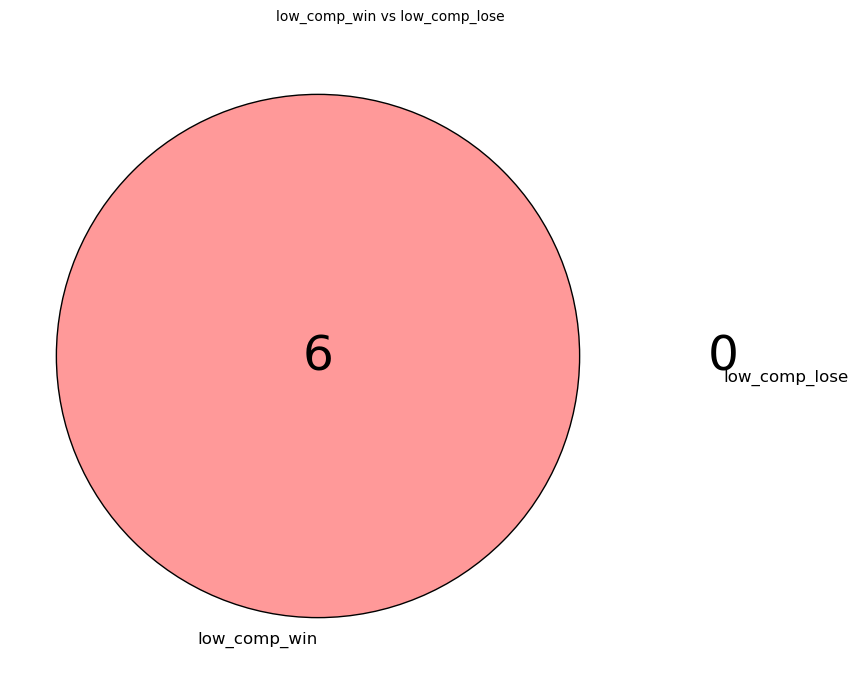

----------------------------------------

Day2:
  Win events: 5 rows
  Lose events: 4 rows
  Creating Venn diagram...
Significant units for increase: [479, 513, 8]
Significant units for decrease: []
All significant units: [479, 513, 8]
low_comp_win: 3 significant units
Significant units for increase: [21]
Significant units for decrease: []
All significant units: [21]
low_comp_lose: 1 significant units
Significant units for overlap: set()

Overlap between low_comp_win and low_comp_lose: 0 units
units in low_comp_win: {'20230613_subj_1-1_t1b2L_box1_Unit479', '20230613_subj_1-1_t1b2L_box1_Unit513', '20240322_subj_3-4_t5b5_Unit8'}
units in low_comp_lose: {'20230614_subj_1-2_t2b2L_box2_Unit21'}


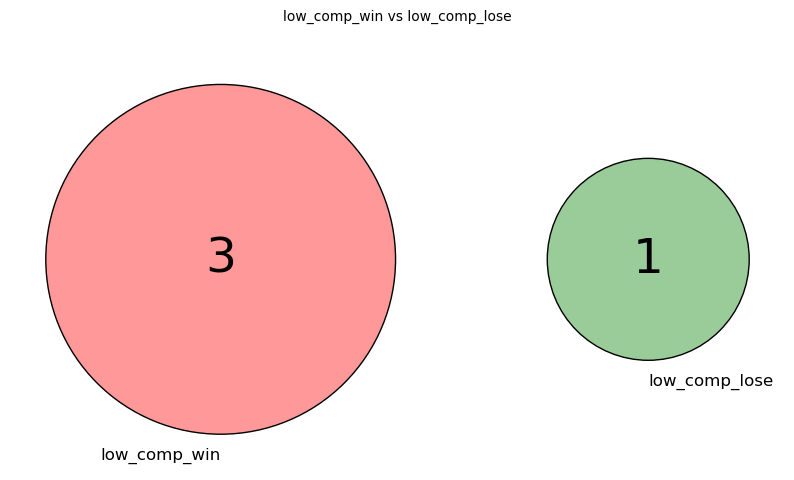

----------------------------------------

Day3:
  Win events: 10 rows
  Lose events: 6 rows
  Creating Venn diagram...
Significant units for increase: [102, 108]
Significant units for decrease: [13]
All significant units: [102, 108, 13]
low_comp_win: 3 significant units
Significant units for increase: [3, 4, 7]
Significant units for decrease: []
All significant units: [3, 4, 7]
low_comp_lose: 3 significant units
Significant units for overlap: set()

Overlap between low_comp_win and low_comp_lose: 0 units
units in low_comp_win: {'20240320_subj_4-3_t5b5_Unit13', '20230616_subj_1-4_t4b3L_box1_Unit102', '20230616_subj_1-4_t4b3L_box1_Unit108'}
units in low_comp_lose: {'20240323_subj_3-4_t6b6_Unit7', '20240323_subj_3-4_t6b6_Unit4', '20240323_subj_3-4_t6b6_Unit3'}


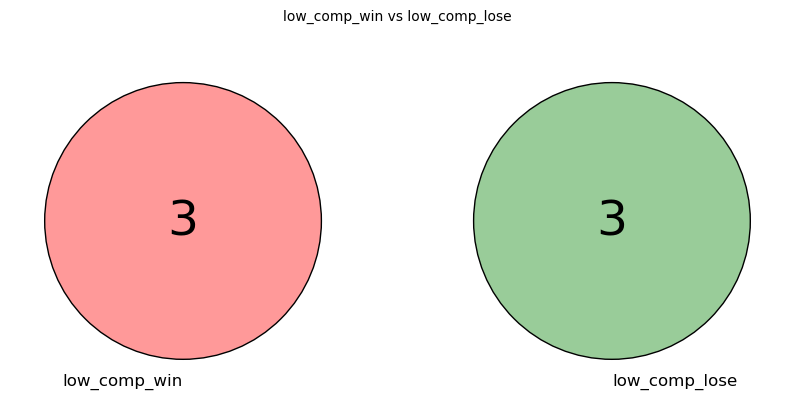

----------------------------------------

Day4:
  Win events: 5 rows
  Lose events: 3 rows
  Creating Venn diagram...
Significant units for increase: [24]
Significant units for decrease: []
All significant units: [24]
low_comp_win: 1 significant units
Significant units for increase: []
Significant units for decrease: []
All significant units: []
low_comp_lose: 0 significant units
Significant units for overlap: set()

Overlap between low_comp_win and low_comp_lose: 0 units
units in low_comp_win: {'20240323_subj_4-2_t5b5_Unit24'}
units in low_comp_lose: set()


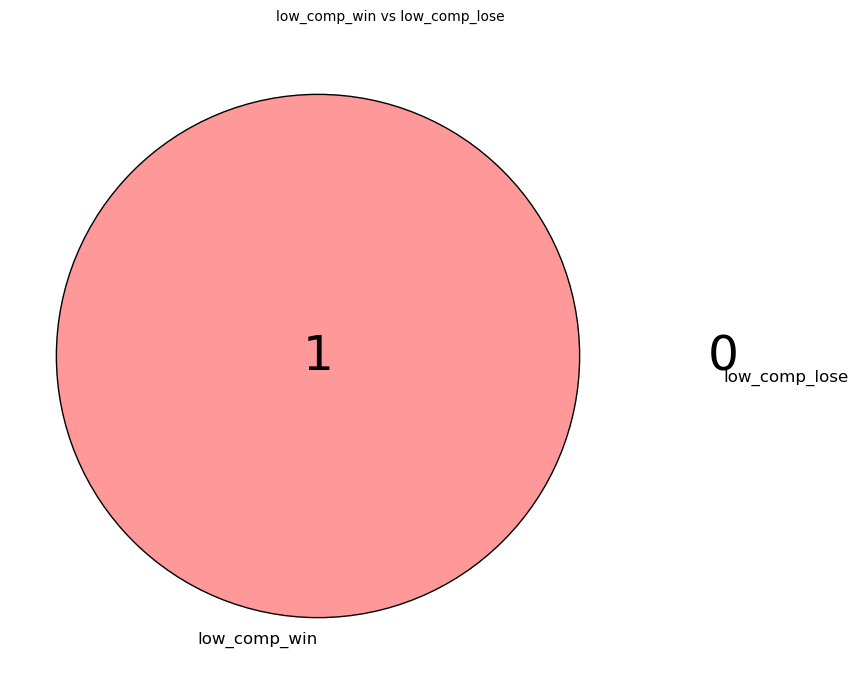

----------------------------------------

Day5:
  Win events: 3 rows
  Lose events: 6 rows
  Creating Venn diagram...
Significant units for increase: [187, 272, 274]
Significant units for decrease: []
All significant units: [187, 272, 274]
low_comp_win: 3 significant units
Significant units for increase: [187, 272, 262]
Significant units for decrease: []
All significant units: [187, 272, 262]
low_comp_lose: 3 significant units
Significant units for overlap: {'20230619_subj_1-4_t3b3L_box2_Unit187', '20230619_subj_1-4_t3b3L_box2_Unit272'}

Overlap between low_comp_win and low_comp_lose: 2 units
units in low_comp_win: {'20230619_subj_1-4_t3b3L_box2_Unit187', '20230619_subj_1-4_t3b3L_box2_Unit274', '20230619_subj_1-4_t3b3L_box2_Unit272'}
units in low_comp_lose: {'20230619_subj_1-4_t3b3L_box2_Unit187', '20230620_subj_1-2_t3b3L_Unit262', '20230619_subj_1-4_t3b3L_box2_Unit272'}


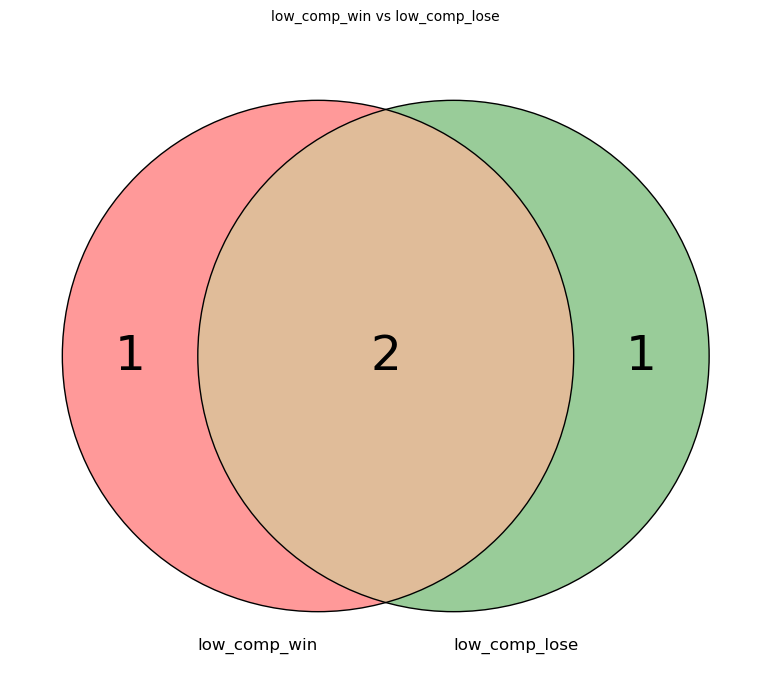

----------------------------------------

Day6:
  Win events: 3 rows
  Lose events: 3 rows
  Creating Venn diagram...
Significant units for increase: [7, 82, 84]
Significant units for decrease: []
All significant units: [7, 82, 84]
low_comp_win: 3 significant units
Significant units for increase: []
Significant units for decrease: []
All significant units: []
low_comp_lose: 0 significant units
Significant units for overlap: set()

Overlap between low_comp_win and low_comp_lose: 0 units
units in low_comp_win: {'20230621_subj_1-4_t3b3L_box1_Unit84', '20230621_subj_1-4_t3b3L_box1_Unit82', '20230621_subj_1-4_t3b3L_box1_Unit7'}
units in low_comp_lose: set()


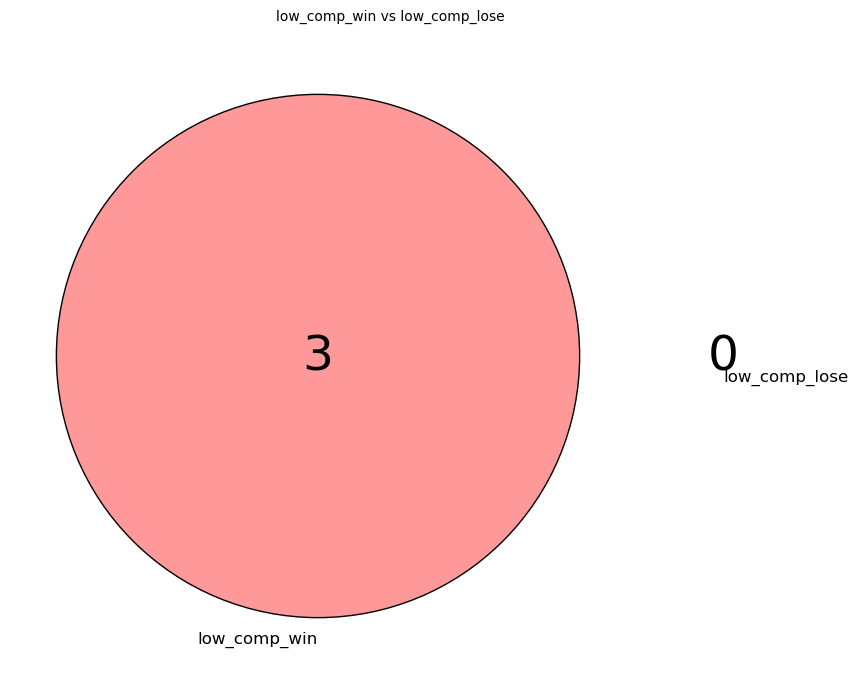

----------------------------------------


In [32]:
# Create win/loss Venn diagrams for each day
print("WIN vs LOSE VENN DIAGRAMS BY DAY")
print("="*60)

for day_name, df in day_dataframes.items():
    print(f"\n{day_name}:")
    
    # Check if we have both win and lose events for this day
    available_events = df['Event name'].unique()
    has_win = 'win' in available_events
    has_lose = 'lose' in available_events
    
    if has_win and has_lose:
        win_count = len(df[df['Event name'] == 'win'])
        lose_count = len(df[df['Event name'] == 'lose'])
        print(f"  Win events: {win_count} rows")
        print(f"  Lose events: {lose_count} rows")
        print(f"  Creating Venn diagram...")
        
        try:
            _ = create_venn_diagram(df, ['low_comp_win', 'low_comp_lose'], 
                                  significance_type='both', 
                                  title=f"Win vs Lose - {day_name}");
        except Exception as e:
            print(f"  Error creating Venn diagram: {e}")
    else:
        print(f"  Skipping - missing events (has win: {has_win}, has lose: {has_lose})")
        print(f"  Available events: {sorted(available_events)}")
    
    print("-" * 40)

WIN vs LOSE VENN DIAGRAMS BY DAY

Day1:
  Win events: 9 rows
  Lose events: 5 rows
  Creating Venn diagram...
Significant units for increase: [232, 52, 86, 90, 101, 106, 4]
Significant units for decrease: [33]
All significant units: [232, 52, 86, 90, 101, 33, 106, 4]
high_comp_win: 8 significant units
Significant units for increase: [211, 52, 101, 23, 6, 4]
Significant units for decrease: [80]
All significant units: [211, 52, 101, 23, 6, 4, 80]
high_comp_lose: 7 significant units
Significant units for overlap: {'20230612_subj_1-4_t4b2L_box1_Unit52', '20240323_subj_3-1_t5b5_Unit4', '20240317_subj_4-3_t5b5_Unit101'}

Overlap between high_comp_win and high_comp_lose: 3 units
units in high_comp_win: {'20230612_subj_1-1_t1b3L_box2_Unit86', '20240320_subj_5-3_t6b6_Unit106', '20240317_subj_4-3_t5b5_Unit101', '20240317_subj_4-2_t6b6_Unit90', '20240323_subj_3-1_t5b5_Unit4', '20230612_subj_1-4_t4b2L_box1_Unit52', '20230612_subj_1-3_t3b3L_box2_Unit232', '20240318_subj_3-4_t5b5_Unit33'}
units in h

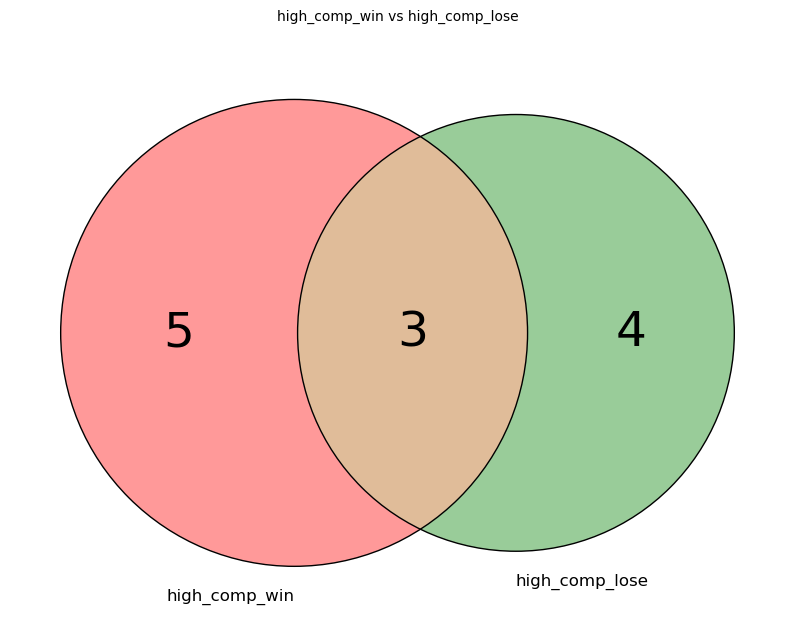

----------------------------------------

Day2:
  Win events: 5 rows
  Lose events: 4 rows
  Creating Venn diagram...
Significant units for increase: [113, 158, 166, 248]
Significant units for decrease: [62, 8]
All significant units: [113, 158, 166, 248, 62, 8]
high_comp_win: 6 significant units
Significant units for increase: [107, 20, 4]
Significant units for decrease: []
All significant units: [107, 20, 4]
high_comp_lose: 3 significant units
Significant units for overlap: set()

Overlap between high_comp_win and high_comp_lose: 0 units
units in high_comp_win: {'20240321_subj_5-3_t5b5_Unit62', '20240318_subj_4-3_t6b6_Unit248', '20240322_subj_3-4_t5b5_Unit8', '20240318_subj_4-3_t6b6_Unit166', '20240318_subj_4-3_t6b6_Unit158', '20240318_subj_4-3_t6b6_Unit113'}
units in high_comp_lose: {'20230613_subj_1-4_t4b3L_box2_Unit4', '20230613_subj_1-4_t4b3L_box2_Unit20', '20230613_subj_1-4_t4b3L_box2_Unit107'}


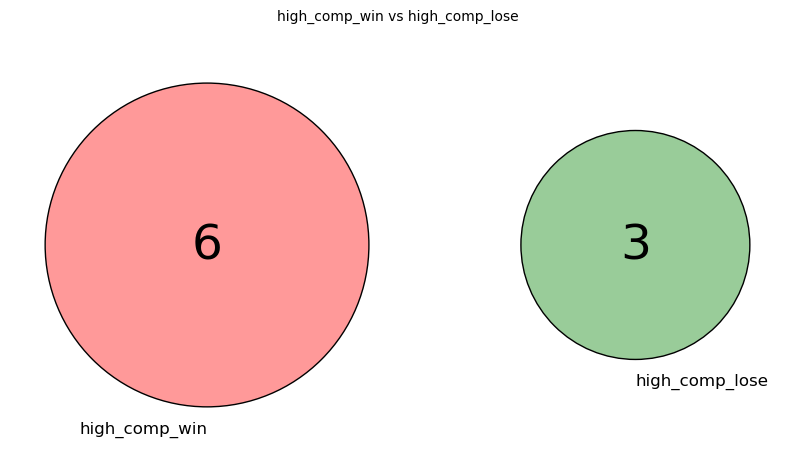

----------------------------------------

Day3:
  Win events: 10 rows
  Lose events: 6 rows
  Creating Venn diagram...
Significant units for increase: [118, 6, 23, 53, 64, 101, 47]
Significant units for decrease: [4]
All significant units: [118, 6, 23, 53, 64, 101, 47, 4]
high_comp_win: 8 significant units
Significant units for increase: [6, 80, 108, 109, 23]
Significant units for decrease: []
All significant units: [6, 80, 108, 109, 23]
high_comp_lose: 5 significant units
Significant units for overlap: {'20230616_subj_1-4_t4b3L_box1_Unit23', '20230614_subj_1-1_t1b3L_box1_Unit6'}

Overlap between high_comp_win and high_comp_lose: 2 units
units in high_comp_win: {'20230616_subj_1-4_t4b3L_box1_Unit64', '20230616_subj_1-4_t4b3L_box1_Unit53', '20240322_subj_3-3_t6b6_Unit101', '20230616_subj_1-4_t4b3L_box1_Unit23', '20240322_subj_3-3_t6b6_Unit47', '20230614_subj_1-1_t1b3L_box1_Unit6', '20240323_subj_3-4_t6b6_Unit4', '20230614_subj_1-1_t1b3L_box1_Unit118'}
units in high_comp_lose: {'20230616

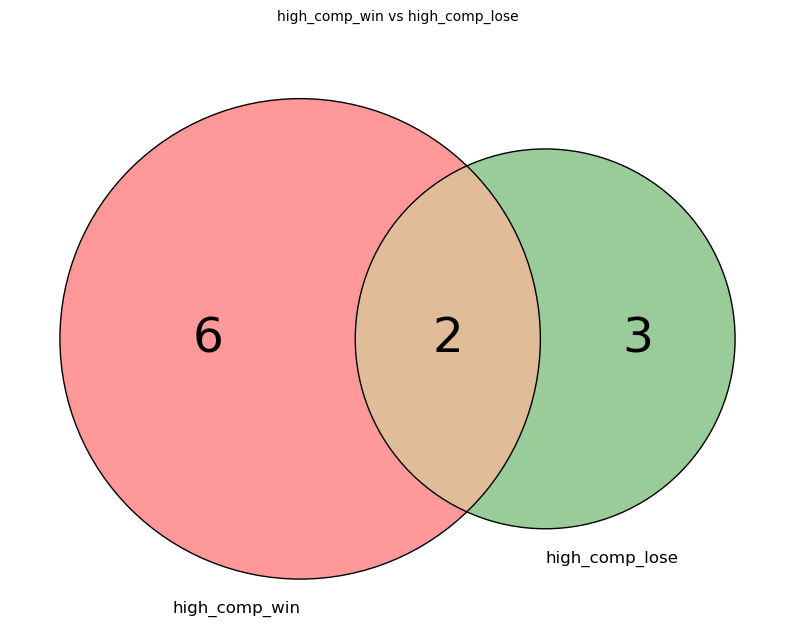

----------------------------------------

Day4:
  Win events: 5 rows
  Lose events: 3 rows
  Creating Venn diagram...
Significant units for increase: [59, 19, 101]
Significant units for decrease: []
All significant units: [59, 19, 101]
high_comp_win: 3 significant units
Significant units for increase: [5, 103, 19, 87, 75]
Significant units for decrease: []
All significant units: [5, 103, 19, 87, 75]
high_comp_lose: 5 significant units
Significant units for overlap: {'20230618_subj_1-4_t4b3L_box1_Unit19'}

Overlap between high_comp_win and high_comp_lose: 1 units
units in high_comp_win: {'20240322_subj_4-3_t6b6_Unit101', '20230618_subj_1-4_t4b3L_box1_Unit19', '20230617_subj_1-1_t1b3L_box1_Unit59'}
units in high_comp_lose: {'20240323_subj_4-2_t5b5_Unit75', '20230617_subj_1-1_t1b3L_box1_Unit5', '20230618_subj_1-4_t4b3L_box1_Unit19', '20230618_subj_1-4_t4b3L_box1_Unit103', '20230618_subj_1-4_t4b3L_box1_Unit87'}


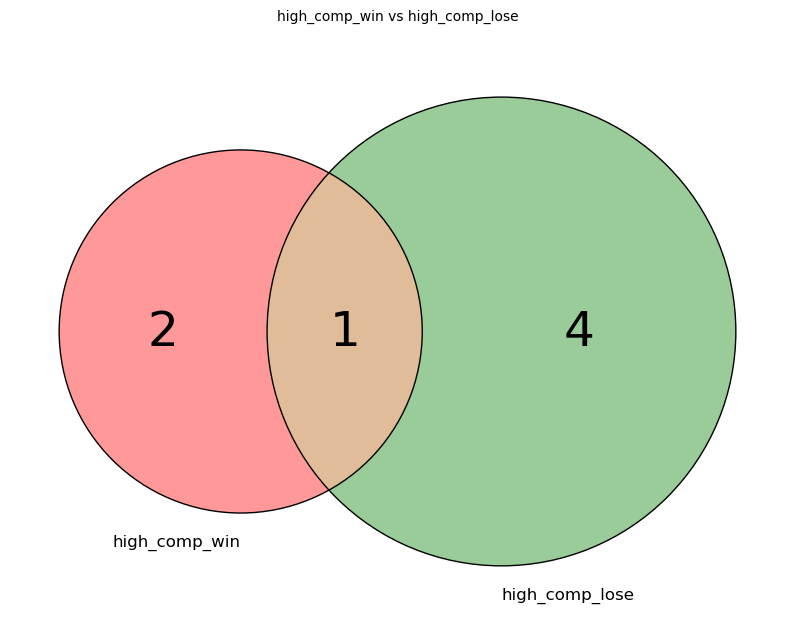

----------------------------------------

Day5:
  Win events: 3 rows
  Lose events: 6 rows
  Creating Venn diagram...
Significant units for increase: []
Significant units for decrease: []
All significant units: []
high_comp_win: 0 significant units
Significant units for increase: [76, 187, 263, 272, 274, 275]
Significant units for decrease: [262]
All significant units: [76, 187, 262, 263, 272, 274, 275]
high_comp_lose: 7 significant units
Significant units for overlap: set()

Overlap between high_comp_win and high_comp_lose: 0 units
units in high_comp_win: set()
units in high_comp_lose: {'20230618_subj_1-1_t1b2L_box2_Unit76', '20230619_subj_1-4_t3b3L_box2_Unit262', '20230619_subj_1-4_t3b3L_box2_Unit187', '20230619_subj_1-4_t3b3L_box2_Unit272', '20230619_subj_1-4_t3b3L_box2_Unit275', '20230619_subj_1-4_t3b3L_box2_Unit274', '20230619_subj_1-4_t3b3L_box2_Unit263'}


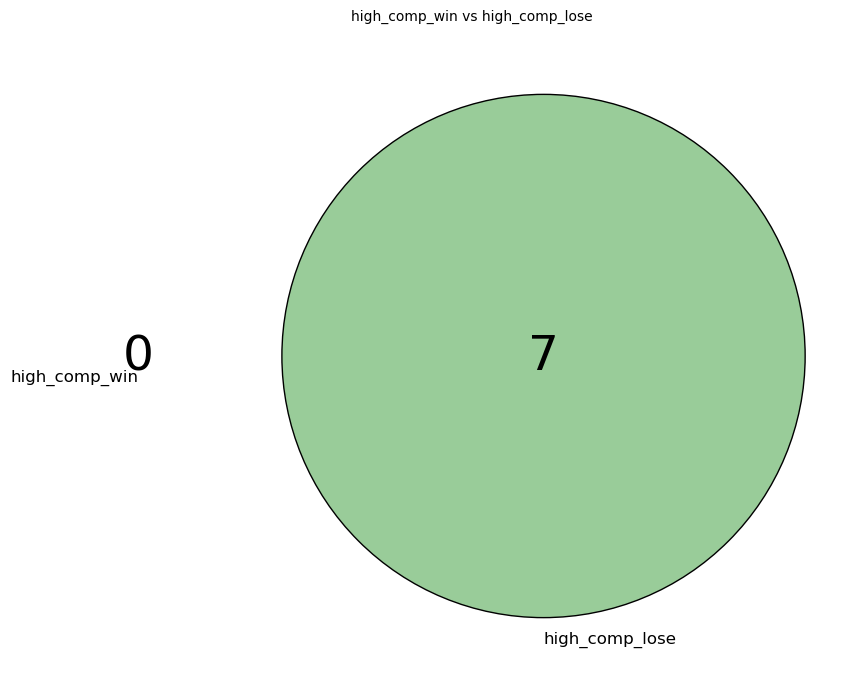

----------------------------------------

Day6:
  Win events: 3 rows
  Lose events: 3 rows
  Creating Venn diagram...
Significant units for increase: []
Significant units for decrease: []
All significant units: []
high_comp_win: 0 significant units
Significant units for increase: [17, 82, 84, 87]
Significant units for decrease: [36]
All significant units: [17, 36, 82, 84, 87]
high_comp_lose: 5 significant units
Significant units for overlap: set()

Overlap between high_comp_win and high_comp_lose: 0 units
units in high_comp_win: set()
units in high_comp_lose: {'20230621_subj_1-4_t3b3L_box1_Unit36', '20230621_subj_1-4_t3b3L_box1_Unit87', '20230621_subj_1-4_t3b3L_box1_Unit17', '20230621_subj_1-4_t3b3L_box1_Unit84', '20230621_subj_1-4_t3b3L_box1_Unit82'}


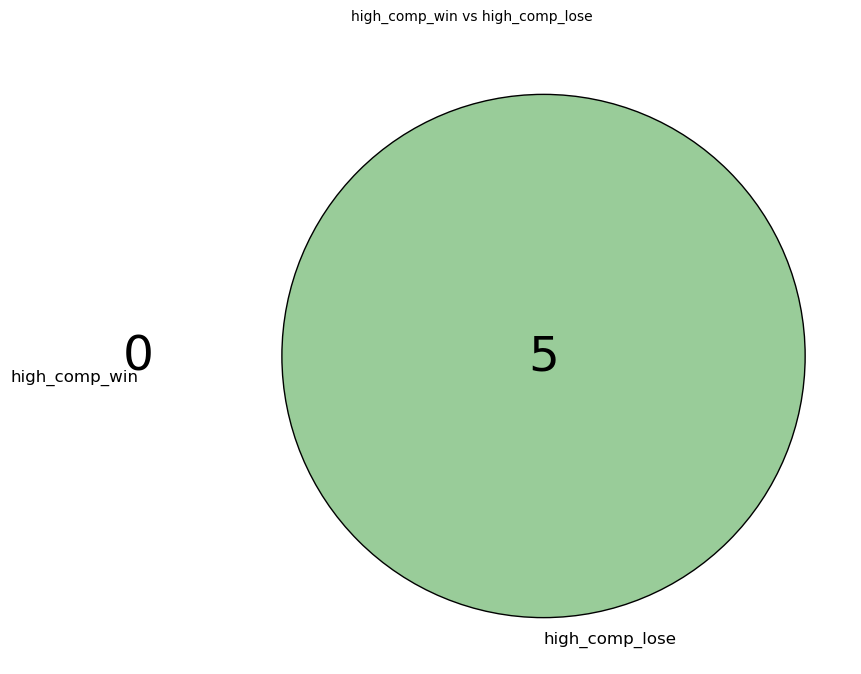

----------------------------------------


In [33]:
# Create win/loss Venn diagrams for each day
print("WIN vs LOSE VENN DIAGRAMS BY DAY")
print("="*60)

for day_name, df in day_dataframes.items():
    print(f"\n{day_name}:")
    
    # Check if we have both win and lose events for this day
    available_events = df['Event name'].unique()
    has_win = 'win' in available_events
    has_lose = 'lose' in available_events
    
    if has_win and has_lose:
        win_count = len(df[df['Event name'] == 'win'])
        lose_count = len(df[df['Event name'] == 'lose'])
        print(f"  Win events: {win_count} rows")
        print(f"  Lose events: {lose_count} rows")
        print(f"  Creating Venn diagram...")
        
        try:
            _ = create_venn_diagram(df, ['high_comp_win', 'high_comp_lose'], 
                                  significance_type='both', 
                                  title=f"Win vs Lose - {day_name}");
        except Exception as e:
            print(f"  Error creating Venn diagram: {e}")
    else:
        print(f"  Skipping - missing events (has win: {has_win}, has lose: {has_lose})")
        print(f"  Available events: {sorted(available_events)}")
    
    print("-" * 40)

## Bad Question with Data but:
- Are there any neurons that appear consistently significance across all days for a subject

### Bad Because we don't have enough sig units per subject
- Our goal therefore is to try to see if an event seems to have more or less neurons specifically firing for that event type compared to another (win vs lose), this can tell us how it reacts

In [34]:
# Analyze which neurons are significant across multiple days for specific events
print("CROSS-DAY NEURONAL CONSISTENCY ANALYSIS")
print("="*60)

# Define events to analyze
events_to_analyze = ['win', 'lose', 'high_comp_win', 'high_comp_lose', 'low_comp_win', 'low_comp_lose']

for event in events_to_analyze:
    print(f"\n{event.upper()}:")
    print("-" * 40)
    
    # Track which units appear on which days for this event
    units_by_day = {}
    days_with_event = []
    
    for day_name, day_df in day_dataframes.items():
        if event in day_df['Event name'].unique():
            event_data = day_df[day_df['Event name'] == event]
            
            # Get unique unit identifiers for this day and event
            # Use subject + unit number to create unique identifiers
            unique_units = []
            for _, row in event_data.iterrows():
                subject = row['Subject_extracted']
                unit_num = row['Unit number']
                unique_id = f"{subject}_Unit{unit_num}"
                unique_units.append(unique_id)
            
            units_by_day[day_name] = set(unique_units)
            days_with_event.append(day_name)
            
            print(f"  {day_name}: {len(set(unique_units))} unique units")
    
    if len(days_with_event) < 2:
        print(f"  Event '{event}' only appears on {len(days_with_event)} day(s) - skipping consistency analysis")
        continue
    
    # Find units that appear across multiple days
    all_units = set()
    for day_units in units_by_day.values():
        all_units.update(day_units)
    
    print(f"\n  Total unique units across all days: {len(all_units)}")
    print(f"  Days with this event: {days_with_event}")
    
    # Count how many days each unit appears in
    unit_day_counts = {}
    for unit in all_units:
        days_present = []
        for day_name, day_units in units_by_day.items():
            if unit in day_units:
                days_present.append(day_name)
        unit_day_counts[unit] = days_present
    
    # Show units that appear on multiple days
    consistent_units = {unit: days for unit, days in unit_day_counts.items() if len(days) > 1}
    
    if consistent_units:
        print(f"\n  CONSISTENT UNITS (appear on multiple days):")
        for unit, days in sorted(consistent_units.items(), key=lambda x: len(x[1]), reverse=True):
            print(f"    {unit}: {len(days)} days ({', '.join(days)})")
        
        # Show units that appear on 3+ days (more forgiving)
        highly_consistent = {unit: days for unit, days in consistent_units.items() if len(days) >= 3}
        if highly_consistent:
            print(f"\n  ⭐ HIGHLY CONSISTENT UNITS (appear on 3+ days):")
            for unit, days in sorted(highly_consistent.items(), key=lambda x: len(x[1]), reverse=True):
                print(f"    {unit}: {len(days)} days ({', '.join(days)})")
        
        # Show units that appear on ALL days
        max_days = max(len(days) for days in consistent_units.values())
        if max_days == len(days_with_event):
            super_consistent = {unit: days for unit, days in consistent_units.items() if len(days) == max_days}
            print(f"\n  🌟 SUPER CONSISTENT UNITS (appear on ALL {max_days} days):")
            for unit, days in super_consistent.items():
                print(f"    {unit}")
    else:
        print(f"  No units appear on multiple days for '{event}'")

print(f"\n{'='*60}")
print("SUMMARY: Look for units that appear consistently across days")
print("These might represent stable neural responses to specific events!")

CROSS-DAY NEURONAL CONSISTENCY ANALYSIS

WIN:
----------------------------------------
  Day1: 9 unique units
  Day2: 5 unique units
  Day3: 10 unique units
  Day4: 5 unique units
  Day5: 3 unique units
  Day6: 3 unique units

  Total unique units across all days: 34
  Days with this event: ['Day1', 'Day2', 'Day3', 'Day4', 'Day5', 'Day6']

  CONSISTENT UNITS (appear on multiple days):
    4-3_Unit101: 2 days (Day1, Day4)

LOSE:
----------------------------------------
  Day1: 5 unique units
  Day2: 4 unique units
  Day3: 6 unique units
  Day4: 3 unique units
  Day5: 6 unique units
  Day6: 3 unique units

  Total unique units across all days: 27
  Days with this event: ['Day1', 'Day2', 'Day3', 'Day4', 'Day5', 'Day6']
  No units appear on multiple days for 'lose'

HIGH_COMP_WIN:
----------------------------------------
  Day1: 8 unique units
  Day2: 6 unique units
  Day3: 8 unique units
  Day4: 3 unique units

  Total unique units across all days: 24
  Days with this event: ['Day1', 'Day